In [1]:
# install dulu kalo belom punya
# !pip install session_info 

In [2]:
# math & tables module
import numpy as np
import pandas as pd

# plotting module
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# module to show version used in project
import session_info

# statistics module
from scipy import stats as st
import statsmodels.stats.proportion as sp


In [3]:
# session module version
session_info.show()

In [4]:
# reading dataset
data = pd.read_csv("train.csv", sep=';')

In [5]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

## Descriptive Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = data.select_dtypes(include=num_dtypes)

numericals = num_df.columns  
print(numericals)


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [8]:
category = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
numerical = ['age','balance','day','duration','campaign','pdays','previous']

In [9]:
ordinal = ['education','default','housing','loan','month','y','marital','poutcome']
nominal = ['job','contact']

### categorical variable detail

In [10]:
data[category].describe()

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

#### investigation for unknown value in categorical variable

##### there are unknown & other value

In [11]:
data.job.value_counts().to_frame().T

job    blue-collar  management  technician  admin.  services  retired  \
count         9732        9458        7597    5171      4154     2264   

job    self-employed  entrepreneur  unemployed  housemaid  student  unknown  
count           1579          1487        1303       1240      938      288

In [12]:
data.education.value_counts().to_frame().T

education  secondary  tertiary  primary  unknown
count          23202     13301     6851     1857

In [13]:
data.contact.value_counts().to_frame().T

contact  cellular  unknown  telephone
count       29285    13020       2906

In [14]:
data.poutcome.value_counts().to_frame().T

poutcome  unknown  failure  other  success
count       36959     4901   1840     1511

##### normal value

In [15]:
data.marital.value_counts().to_frame().T

marital  married  single  divorced
count      27214   12790      5207

In [16]:
data.default.value_counts().to_frame().T

default     no  yes
count    44396  815

In [17]:
data.housing.value_counts().to_frame().T

housing    yes     no
count    25130  20081

In [18]:
data.loan.value_counts().to_frame().T

loan      no   yes
count  37967  7244

In [19]:
data.month.value_counts().to_frame().T

month    may   jul   aug   jun   nov   apr   feb   jan  oct  sep  mar  dec
count  13766  6895  6247  5341  3970  2932  2649  1403  738  579  477  214

In [20]:
data.y.value_counts().to_frame().T

y         no   yes
count  39922  5289

### numerical variabel detail

In [21]:
data[numerical].describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Aneh: balance, pdays, previous

## Univariate Analysis

### numerical

In [22]:
data[numerical].describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [23]:
data[category].describe()

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

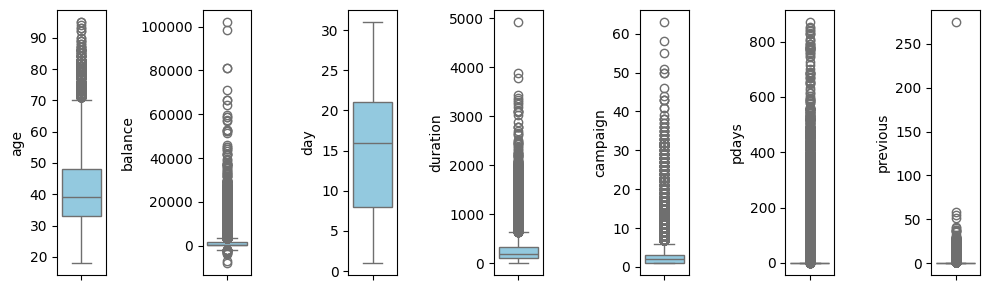

In [24]:
feature = numerical

plt.figure(figsize=(10,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.boxplot(y=data[feature[i]], color='skyblue', orient='v')
    plt.tight_layout()

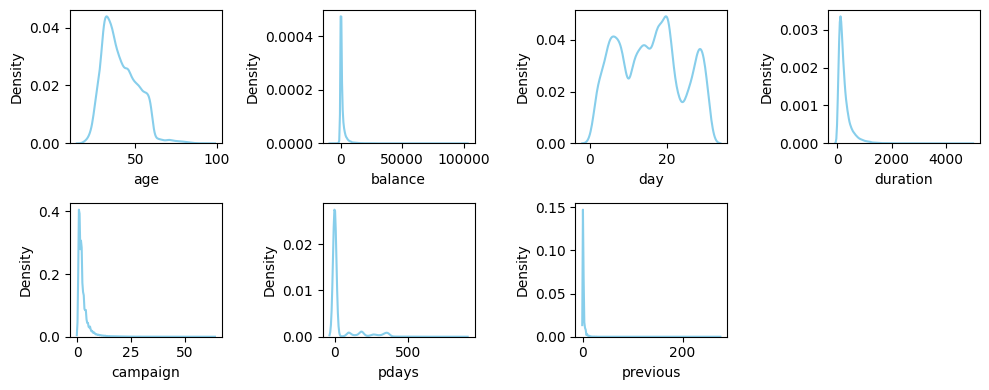

In [25]:
feature = numerical

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.kdeplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

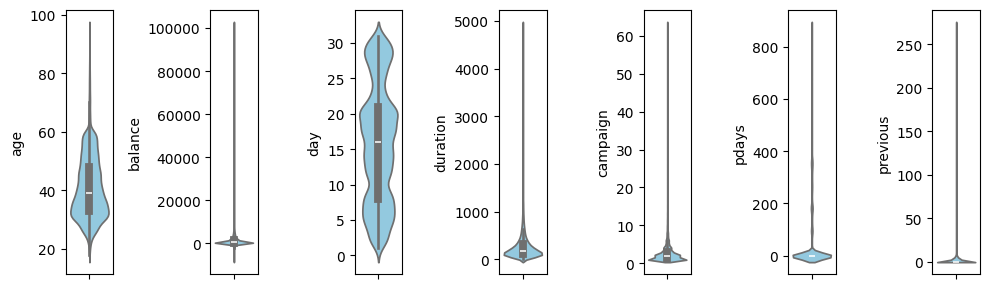

In [26]:
feature = numerical

plt.figure(figsize=(10,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.violinplot(y=data[feature[i]], color='skyblue')
    plt.tight_layout()

### categorical

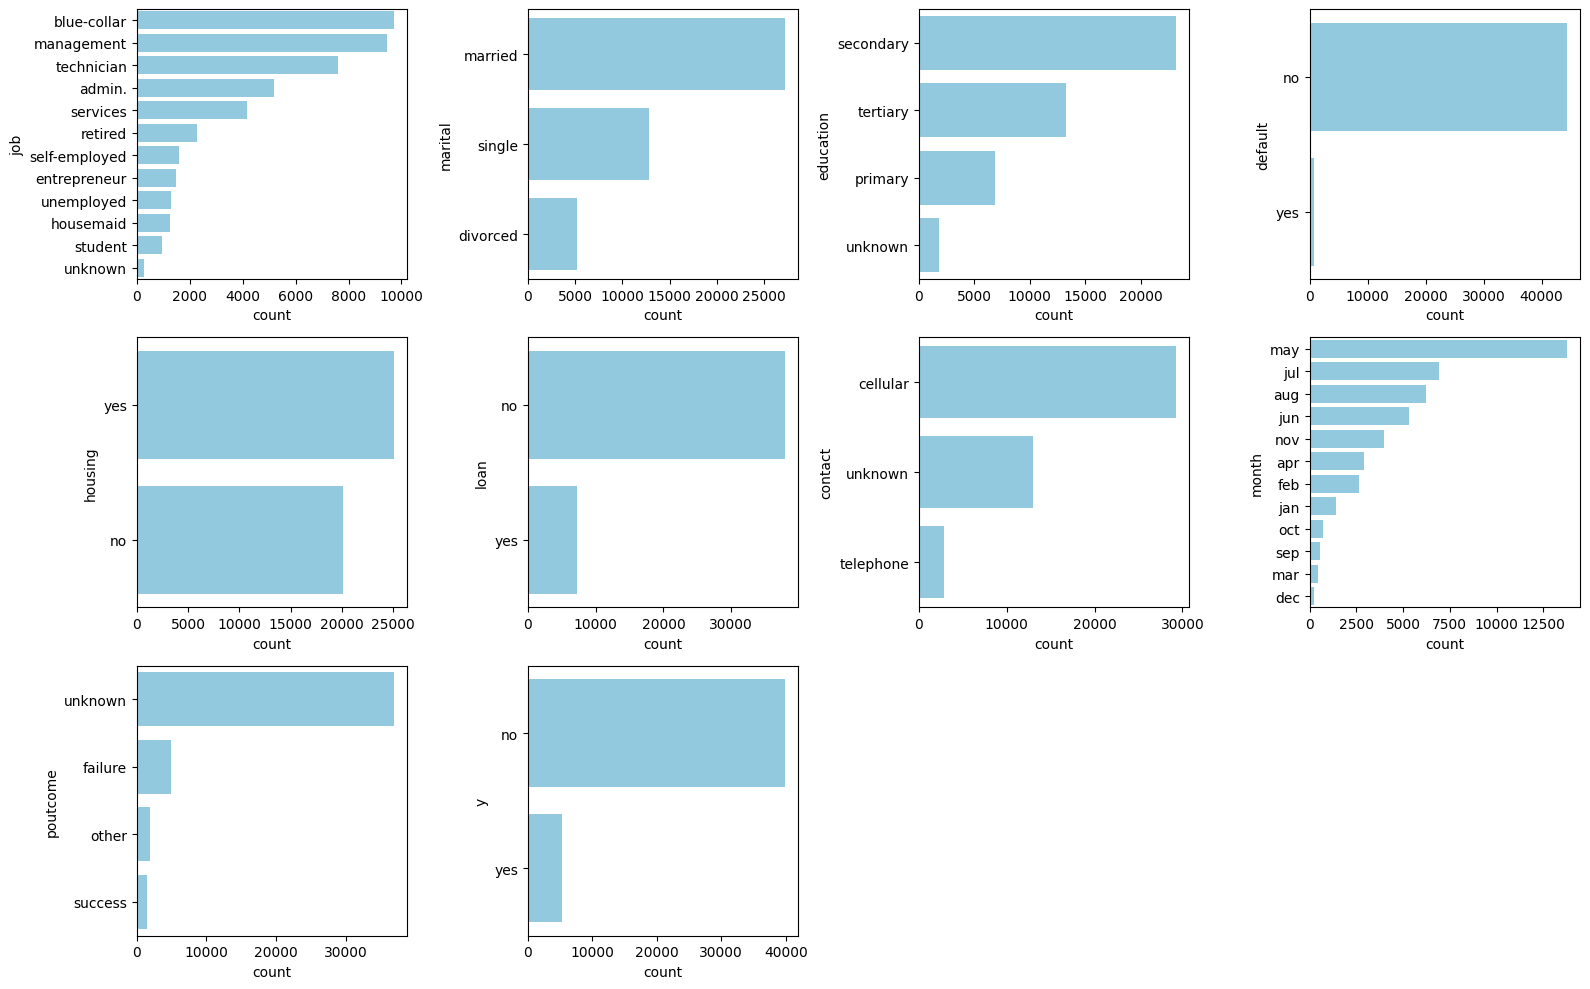

In [27]:
feature = category
plt.figure(figsize=(16,10))
for i in range(0,len(feature)):
    plt.subplot(3, 4, i+1)
    sns.countplot(y=data[feature[i]], color='skyblue', order=data[feature[i]].value_counts().index)
    plt.tight_layout() 

## Multivariate Analysis

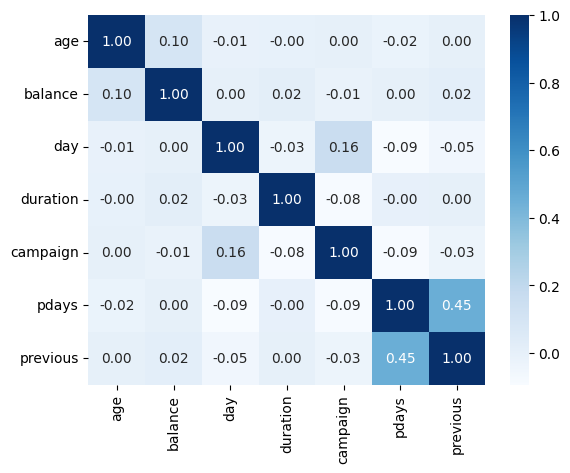

In [28]:
sns.heatmap(data[numerical].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

korelasi antarvariabel tidak ada yang memiliki hubungan yang kuat, namun ada yang memiliki hubungan positif yang cukup sedang yaitu antara variabel pdays dengan previous sebesar 0.45. Dimana jika pdays mengalami kenaikan, maka previous juga meningkat, begitupun sebaliknya. Kemudian disusul oleh hubungan antara campaign dan day sebesar 0.16. Untuk variabel lainnya memiliki hubungan yang sangat lemah karena mendekati nilai 0, bahkan tidak ada hubungan sama sekali antara variabel duration&previous, age&previous, balance&pdays, age&campaign, duration&age, day&balance.

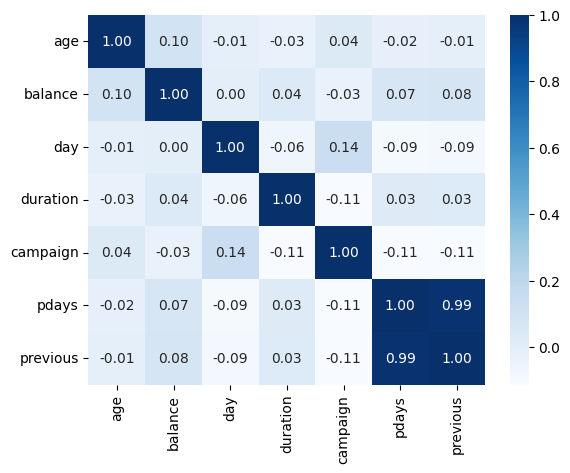

In [29]:
sns.heatmap(data[numerical].corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')
plt.show()

perbedaan terlihat pada heatmap ini dengan metode spearman karena distrubsi non-normal yang dimiliki kolom. Terlihat bahwa ```previous``` dan ```pdays``` memiliki korelasi yang tinggi dengan kemungkinan redundan feature.

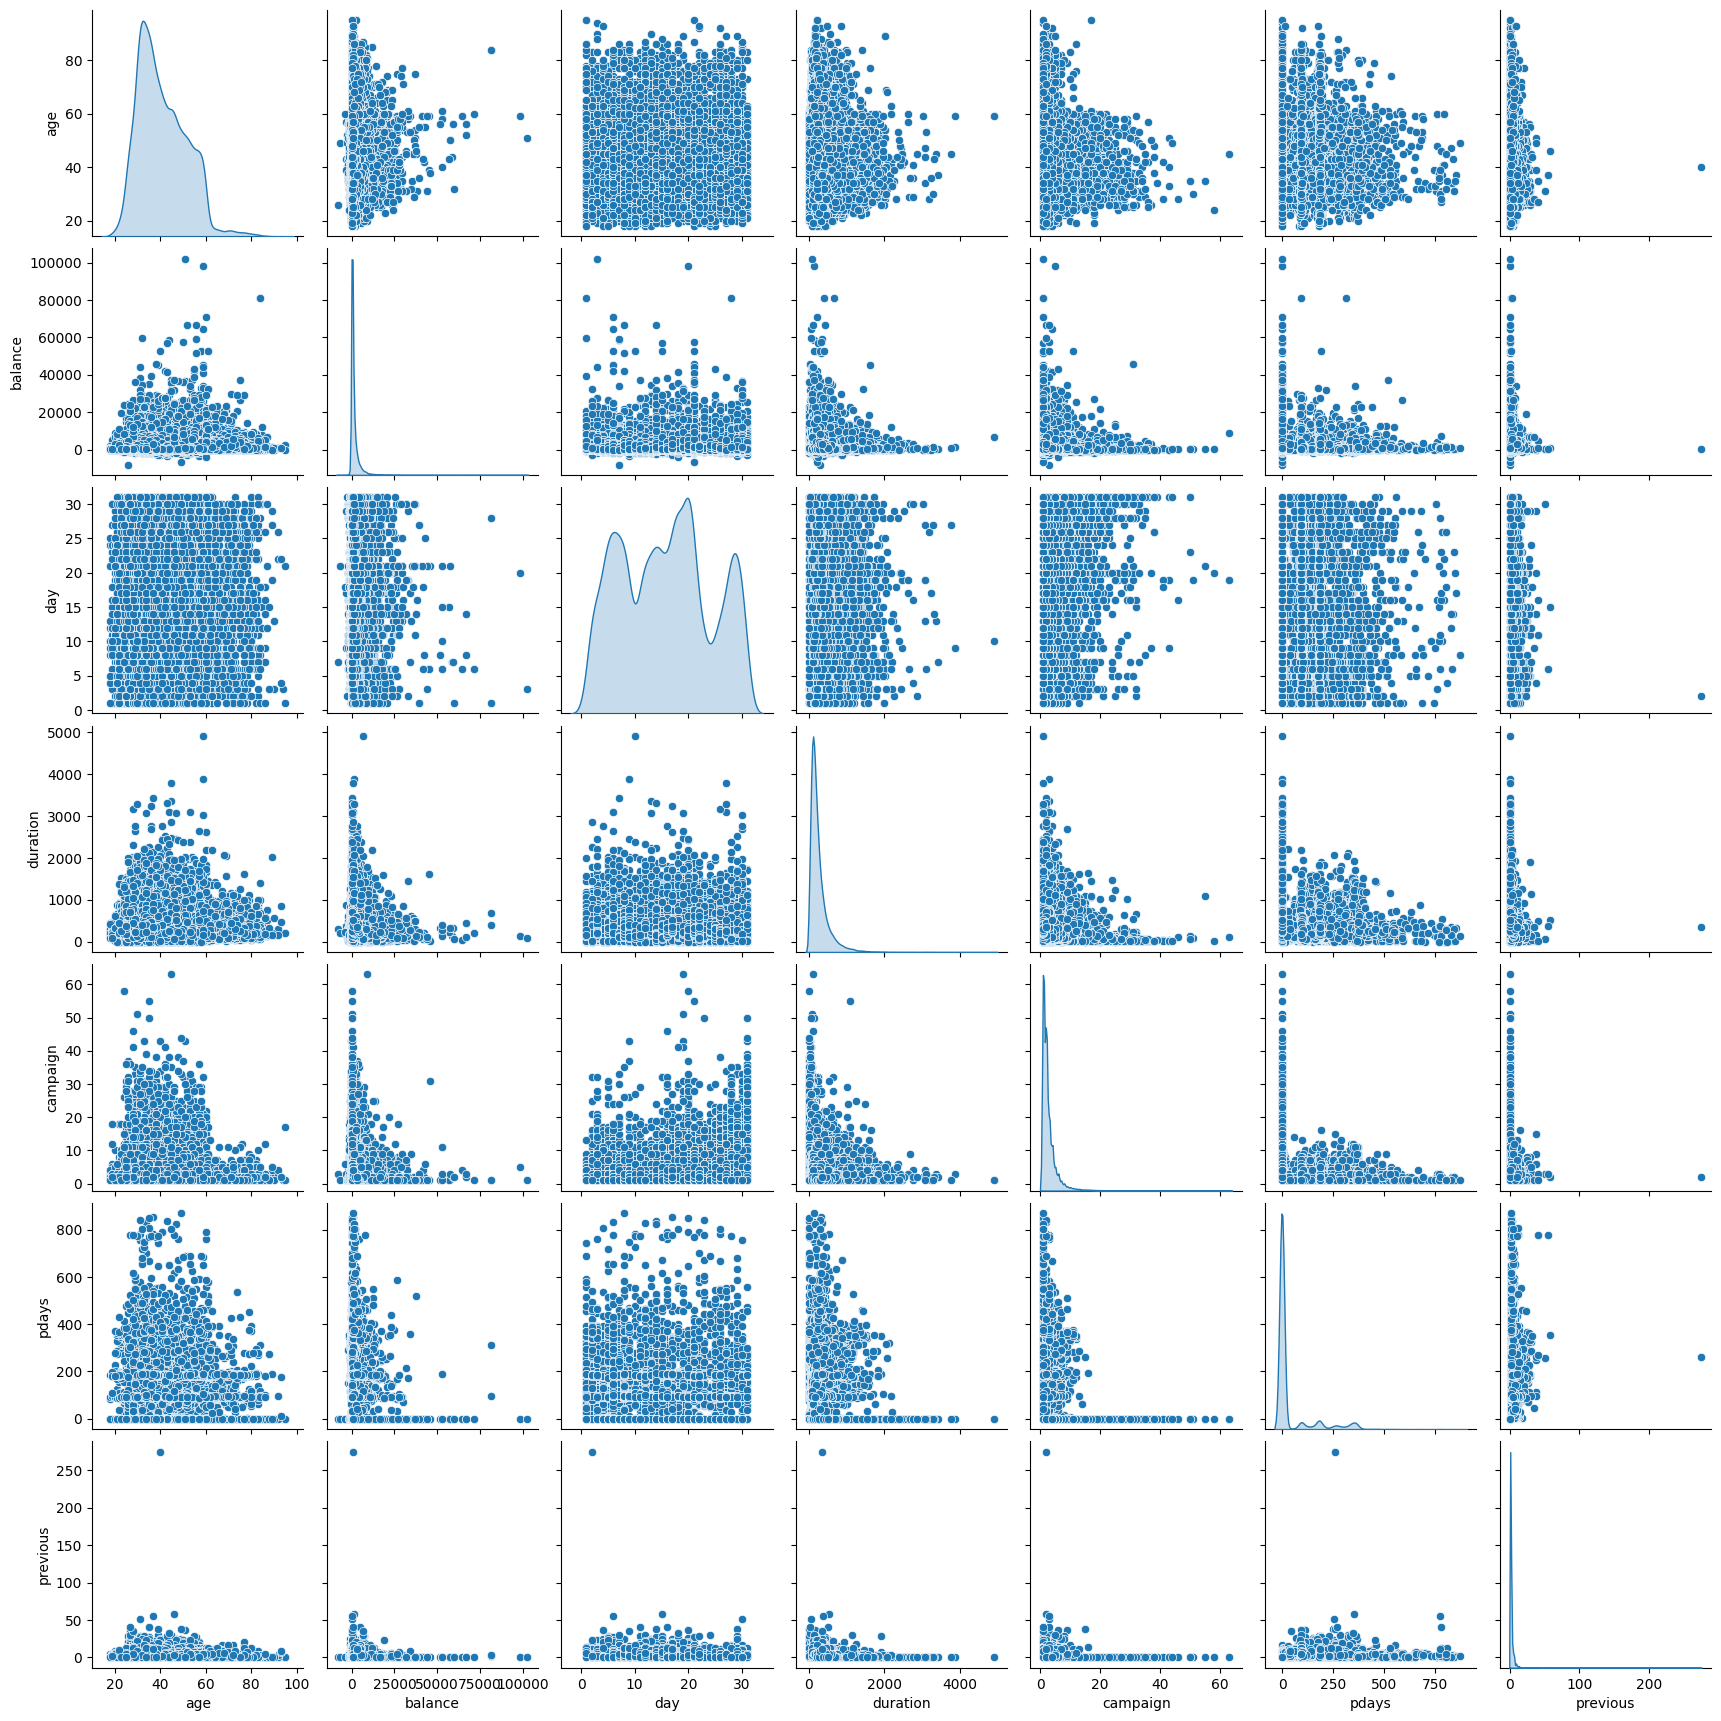

In [30]:
sns.pairplot(data[numerical], diag_kind='kde')
plt.show()

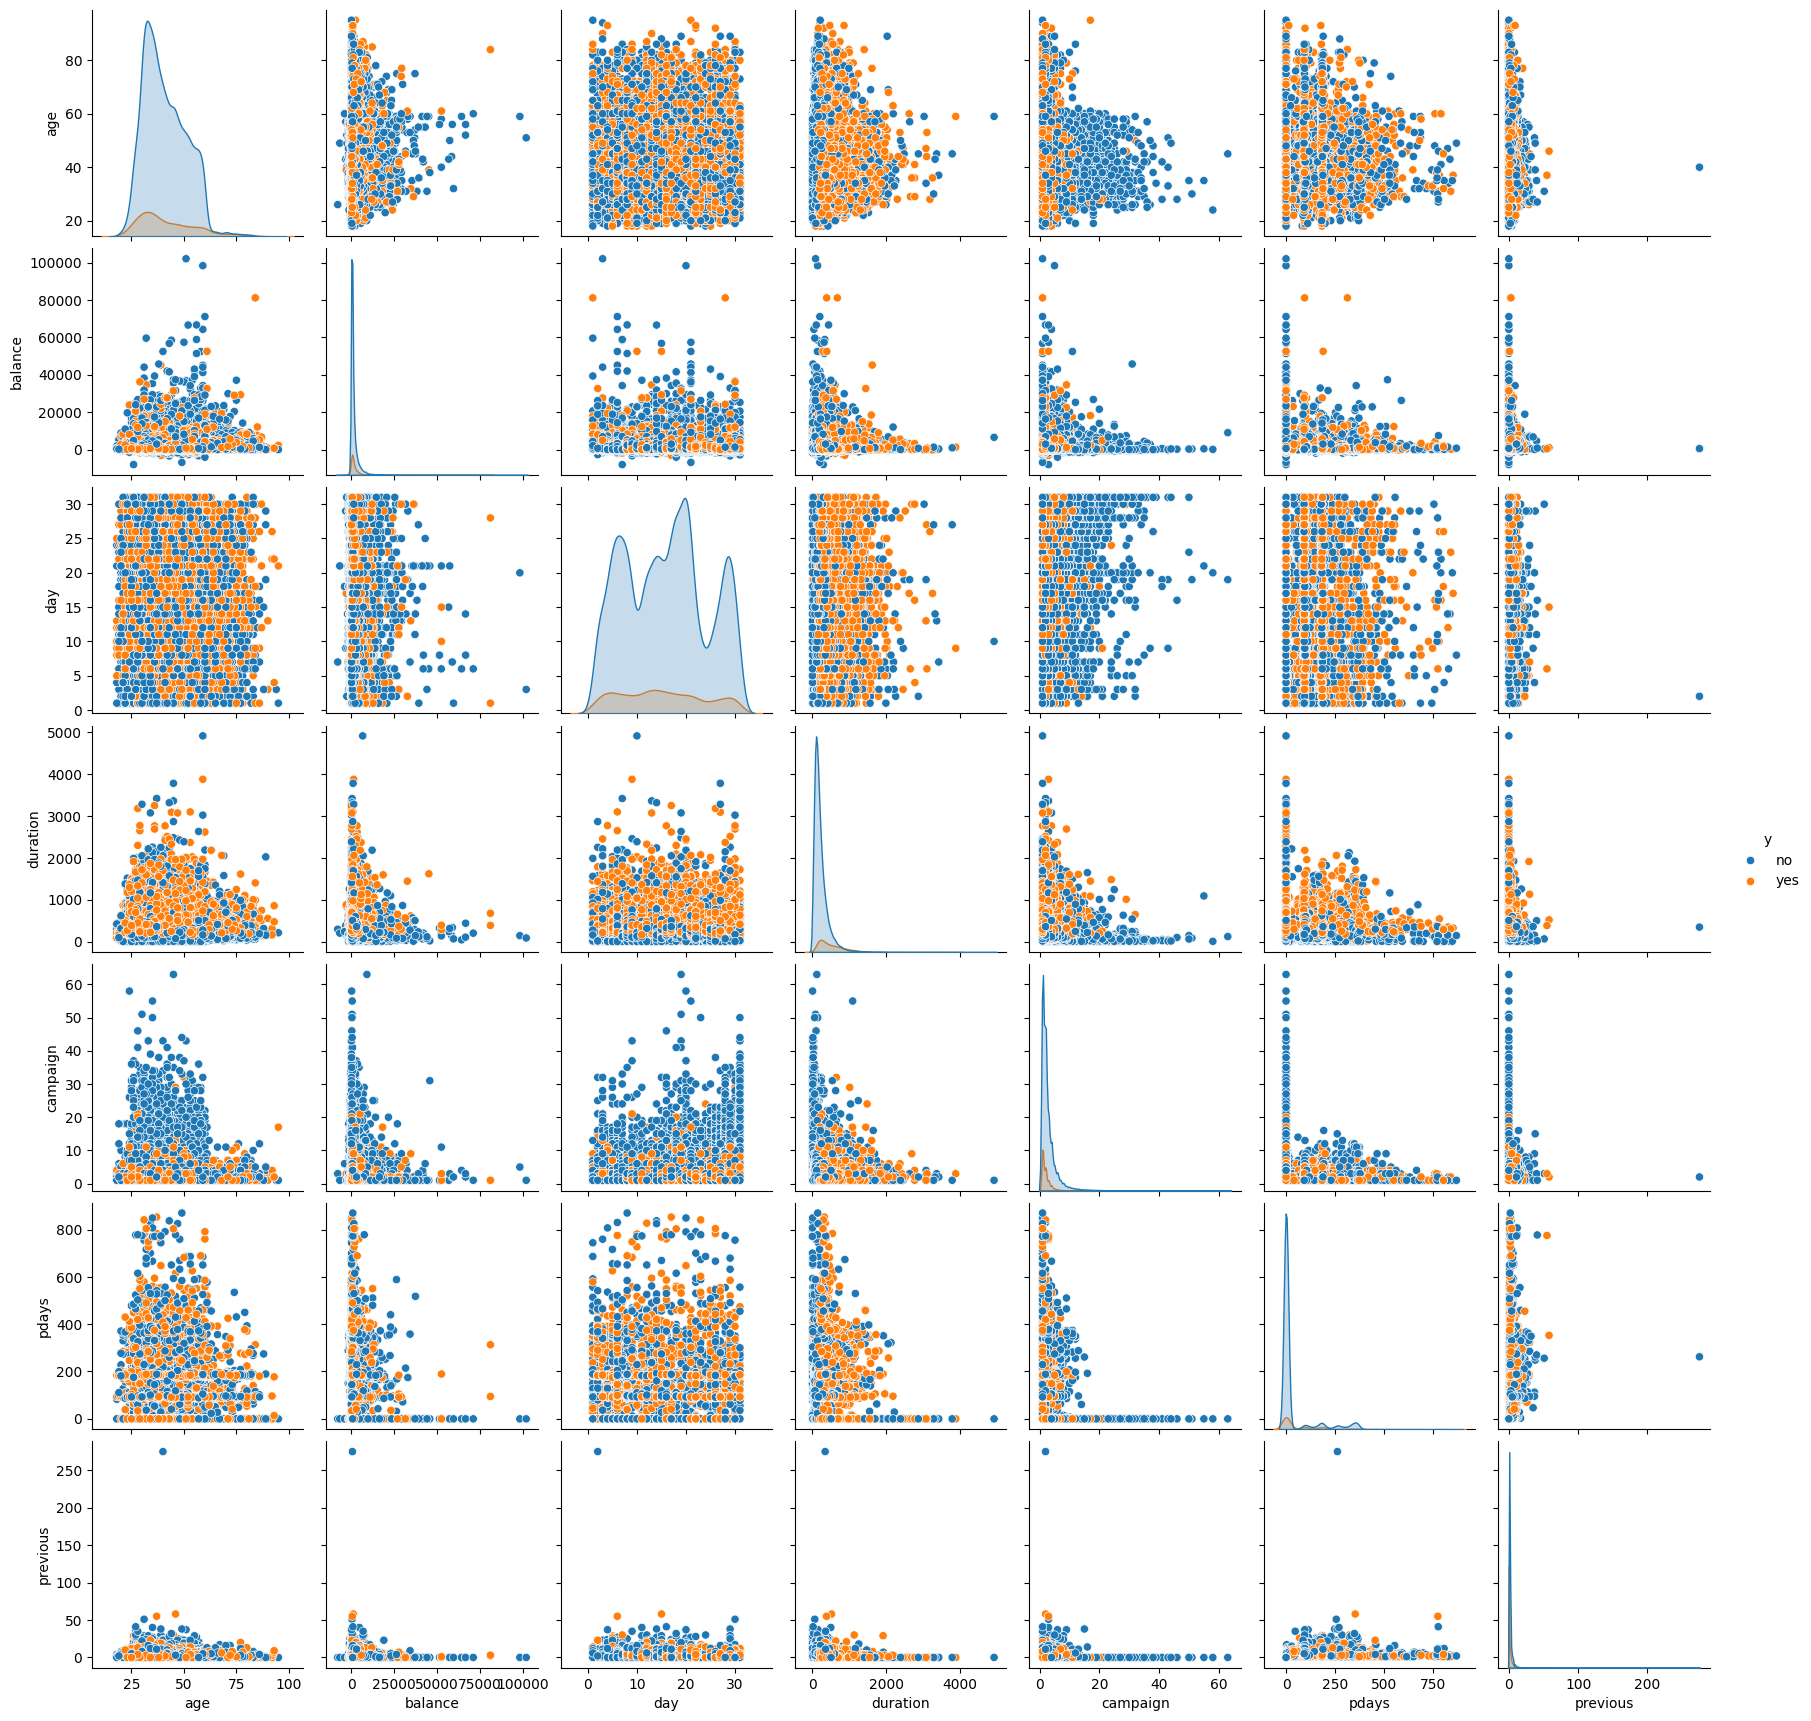

In [31]:
sns.pairplot(data, diag_kind='kde', hue='y')
plt.show()

## Business Insight

### Call Duration correlated to Conversion Rate

In [32]:
data_used = data.loc[:,['duration', 'y']]

In [33]:
data_used.sample(3)

duration   y
30498       110  no
15261        91  no
10605       235  no

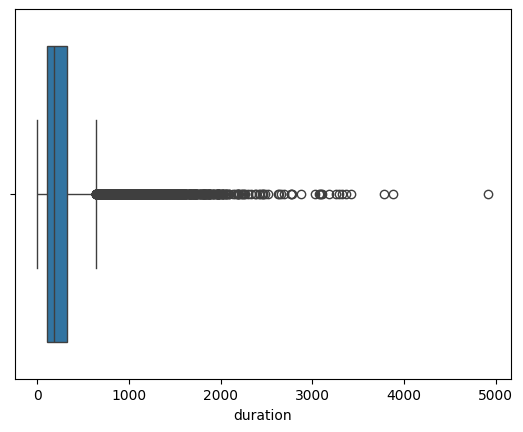

In [34]:
# distribution before pre-processing

sns.boxplot(data_used, x='duration')
plt.show()

In [35]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['duration']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [36]:
data_used.head()

duration   y  abs_zscore  filtered_entries
0       261  no    0.011016              True
1       151  no    0.416127              True
2        76  no    0.707361              True
3        92  no    0.645231              True
4       198  no    0.233620              True

In [37]:
data_used = data_used.query("filtered_entries == True")

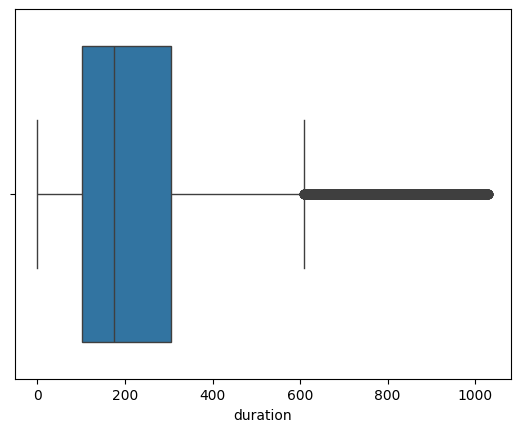

In [38]:
# distribution after pre-processing

sns.boxplot(data_used, x='duration')
plt.show()

#### Hipotesis

> H0: Durasi Call Marketing **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Durasi Call Marketing **meningkatkan** keinginan nasabah membuka rekening term deposit

In [39]:
# dividing duration to long and short using its median

parameter = data_used.duration.median()
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah duration yang lebih dari', parameter)

Berdasarkan pencarian pemusatan, 
Didapatkan parameter jumlah adalah duration yang lebih dari 176.0


In [40]:
control = data_used.query("duration <= 176")
treatment = data_used.query("duration > 176")

#### Marketing success rate identification

In [41]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [42]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [43]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [44]:
print('Conversion Rate Control :', round(cr_control*100, 2))

Conversion Rate Control : 3.04


In [45]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

Conversion Rate Treatment :  18.29


#### Graph

<BarContainer object of 2 artists>

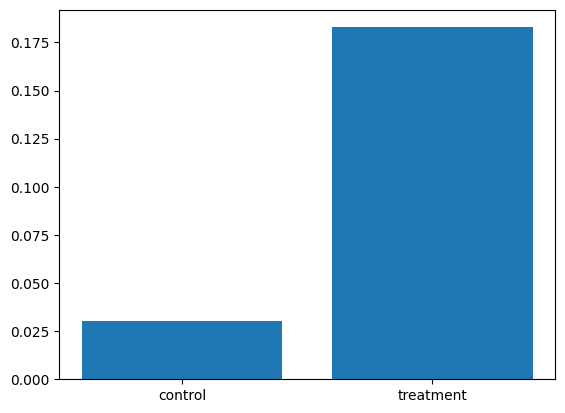

In [46]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)

#### z-value proportions

In [47]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [48]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

P-value yang dihasilkan melalui uji z-value proportions adalah:  0.0


In [49]:
if pvalue >= 0.05 :
    print('H0 diterima, Durasi Call Marketing tidak meningkatkan keinginan nasabah membuka rekening deposito')
else :
    print('H1 diterima, Durasi Call Marketing meningkatkan keinginan nasabah membuka rekening deposito')

H1 diterima, Durasi Call Marketing meningkatkan keinginan nasabah membuka rekening deposito


#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa durasi call marketing berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk call duration yang lebih lama (lebih dari 176 detik)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **meningkatkan call duration untuk setiap potential customer menjadi setidaknya selama 176 detik.**

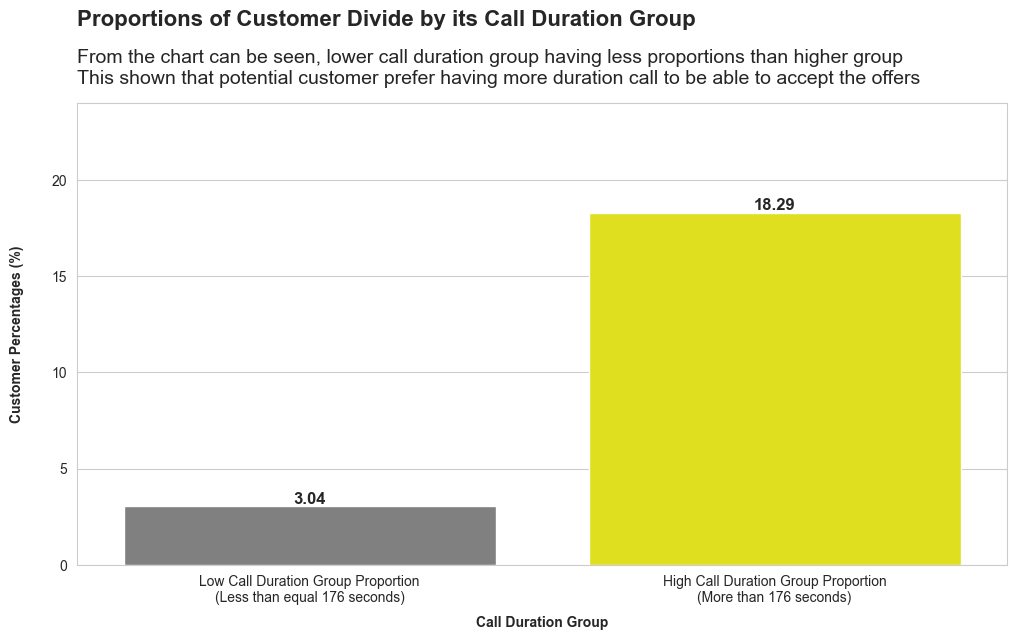

In [50]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,24)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, hue=colors, palette=colors, legend=False)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,28,'Proportions of Customer Divide by its Call Duration Group', fontweight='bold', fontsize=16)
plt.text(-0.5,25,'From the chart can be seen, lower call duration group having less proportions than higher group\nThis shown that potential customer prefer having more duration call to be able to accept the offers', fontsize='14')
plt.xlabel('Call Duration Group', fontweight='bold', labelpad=8)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Call Duration Group Proportion\n(Less than equal 176 seconds)', 'High Call Duration Group Proportion\n(More than 176 seconds)'])

plt.show()

### Campaign Amount Correlated to Conversion Rate

In [51]:
data_used = data.loc[:,['campaign', 'y']]

In [52]:
data_used.sample(3)

campaign   y
346           4  no
18400         2  no
5007          2  no

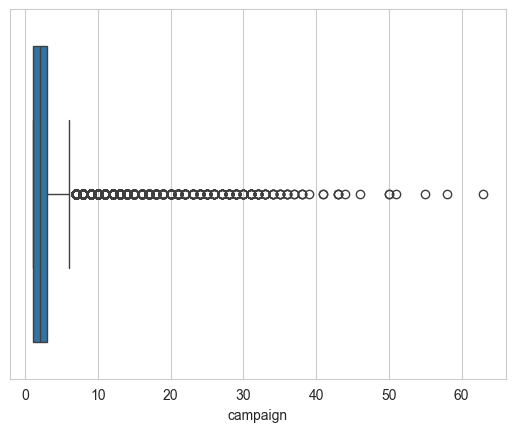

In [53]:
# distribution before pre-processing

sns.boxplot(data_used, x='campaign')
plt.show()

In [54]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['campaign']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [55]:
data_used.head()

campaign   y  abs_zscore  filtered_entries
0         1  no    0.569351              True
1         1  no    0.569351              True
2         1  no    0.569351              True
3         1  no    0.569351              True
4         1  no    0.569351              True

In [56]:
data_used = data_used.query("filtered_entries == True")

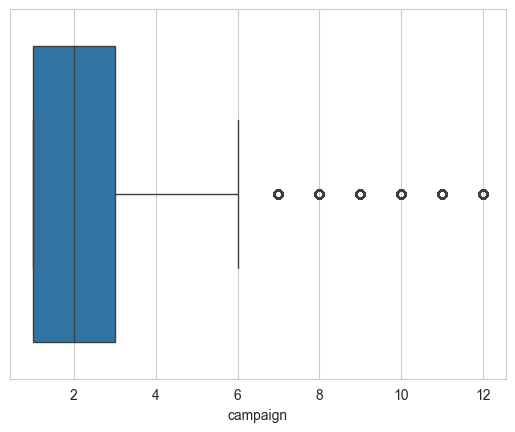

In [57]:
# distribution after pre-processing

sns.boxplot(data_used, x='campaign')
plt.show()

#### Hipotesis

> H0: Jumlah Campaign **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah Campaign **meningkatkan** keinginan nasabah membuka rekening term deposit

In [58]:
# dividing duration to long and short using its median

parameter = data_used.campaign.median()
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah duration yang lebih dari', parameter)

Berdasarkan pencarian pemusatan, 
Didapatkan parameter jumlah adalah duration yang lebih dari 2.0


In [59]:
control = data_used.query("campaign <= 2")
treatment = data_used.query("campaign > 2")

#### Marketing success rate identification

In [60]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [61]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [62]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [63]:
print('Conversion Rate Control :', round(cr_control*100, 2))

Conversion Rate Control : 13.19


In [64]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

Conversion Rate Treatment :  9.08


#### Graph

<BarContainer object of 2 artists>

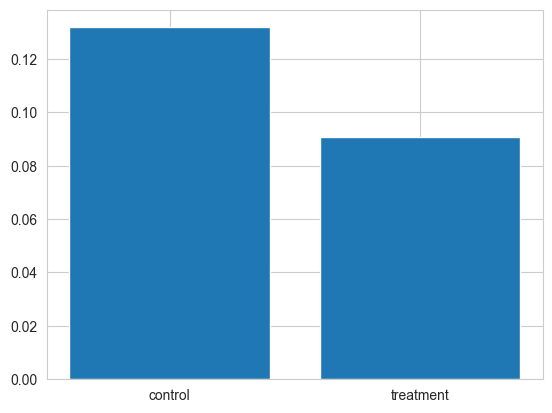

In [65]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)

#### z-value proportions

In [66]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [67]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

P-value yang dihasilkan melalui uji z-value proportions adalah:  6.243994844434205e-36


In [68]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah Campaign tidak meningkatkan keinginan nasabah membuka rekening term deposit')
else :
    print('H1 diterima, Jumlah Campaign meningkatkan keinginan nasabah membuka rekening term deposit')

H1 diterima, Jumlah Campaign meningkatkan keinginan nasabah membuka rekening term deposit


#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah campaign yang pernah diberikan terhadap customer berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada control group yang merupakan data group untuk jumlah campaign yang lebih sedikit (kurang sama dengan 2)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **membatasi jumlah campaign untuk setiap potential customer menjadi paling banyak 2.**

#### Visualization

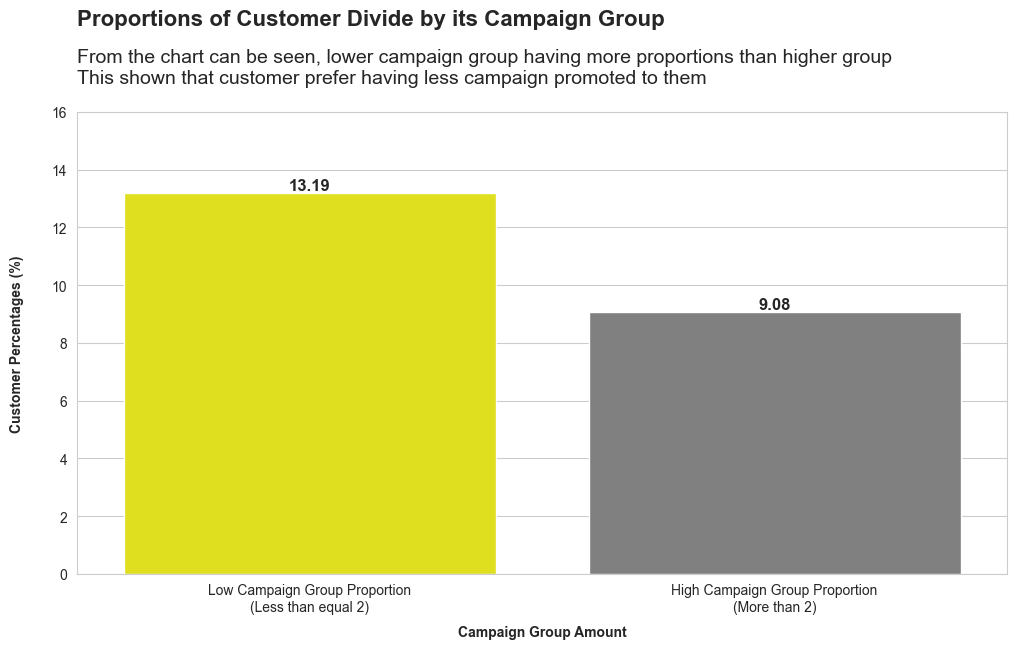

In [69]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,16)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors, legend=False)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,19,'Proportions of Customer Divide by its Campaign Group', fontweight='bold', fontsize=16)
plt.text(-0.5,17,'From the chart can be seen, lower campaign group having more proportions than higher group\nThis shown that customer prefer having less campaign promoted to them', fontsize='14')
plt.xlabel('Campaign Group Amount', fontweight='bold', labelpad=8)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Campaign Group Proportion\n(Less than equal 2)', 'High Campaign Group Proportion\n(More than 2)'])

plt.show()

### Contact Amount on Previous Campaign Group Correlated to Conversion Rate

In [70]:
data_used = data.loc[:,['previous', 'y']]

In [71]:
data_used.sample(3)

previous   y
17333         0  no
38667         2  no
27937         0  no

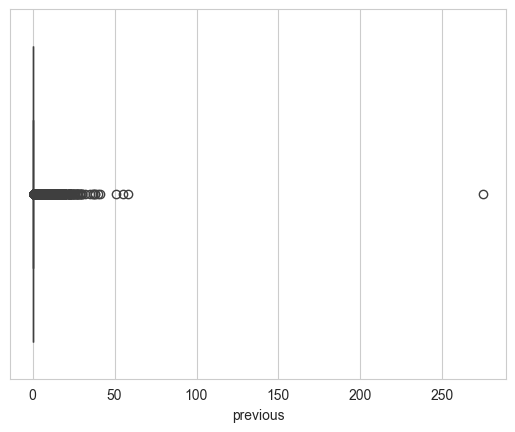

In [72]:
# distribution before pre-processing

sns.boxplot(data_used, x='previous')
plt.show()

In [73]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['previous']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [74]:
data_used.sample(5)

previous    y  abs_zscore  filtered_entries
43682         2  yes    0.616335              True
34588         0   no    0.251940              True
43514         0   no    0.251940              True
1856          0   no    0.251940              True
28343         0   no    0.251940              True

In [75]:
data_used = data_used.query("filtered_entries == True")

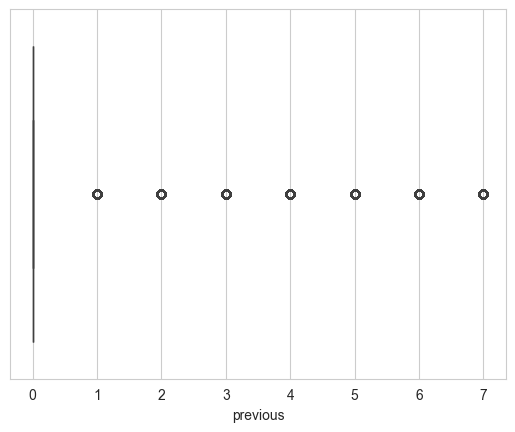

In [76]:
# distribution after pre-processing

sns.boxplot(data_used, x='previous')
plt.show()

#### Hipotesis

> H0: Jumlah kontak pada campaign sebelumnya **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah kontak pada campaign sebelumnya **meningkatkan** keinginan nasabah membuka rekening term deposit

In [77]:
# dividing duration to long and short using its median

parameter = data_used.previous.median()
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah kontak yang lebih dari', parameter)

Berdasarkan pencarian pemusatan, 
Didapatkan parameter jumlah adalah kontak yang lebih dari 0.0


In [78]:
control = data_used.query("previous == 0")
treatment = data_used.query("previous > 0")

#### Marketing Success rate

In [79]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [80]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [81]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [82]:
print('Conversion Rate Control :', round(cr_control*100, 2))

Conversion Rate Control : 9.16


In [83]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

Conversion Rate Treatment :  22.96


#### Graph

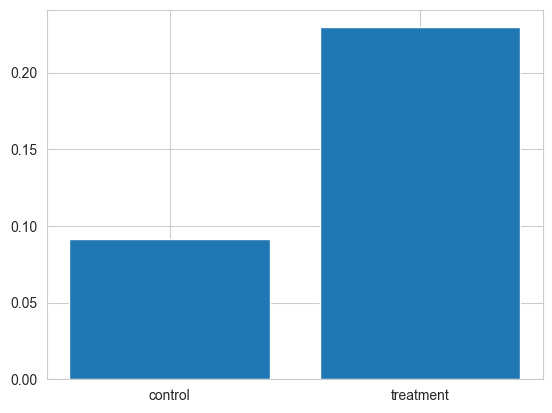

In [84]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)
plt.show()

#### z-value proportions

In [85]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [86]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

P-value yang dihasilkan melalui uji z-value proportions adalah:  5.326344482730863e-260


In [87]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah kontak pada campaign sebelumnya tidak meningkatkan keinginan nasabah membuka rekening deposito')
else :
    print('H1 diterima, Jumlah kontak pada campaign sebelumnya meningkatkan keinginan nasabah membuka rekening deposito')

H1 diterima, Jumlah kontak pada campaign sebelumnya meningkatkan keinginan nasabah membuka rekening deposito


#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah kontak pada campaign sebelumnya berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk customer yang pernah di kontak (lebih dari 0)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **meningkatkan engangement kepada customer melalui kontak customer setidaknya sekali dalam satu campaign**

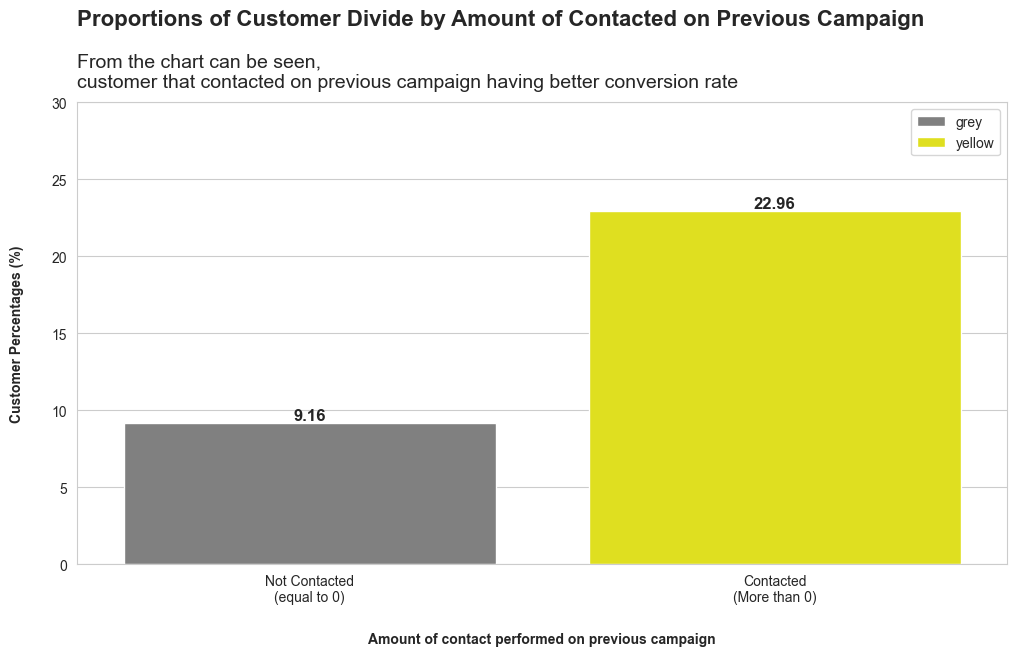

In [88]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,30)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');

plt.text(-0.5,35,'Proportions of Customer Divide by Amount of Contacted on Previous Campaign', fontweight='bold', fontsize=16)
plt.text(-0.5,31,'From the chart can be seen,\ncustomer that contacted on previous campaign having better conversion rate', fontsize=14)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xlabel('Amount of contact performed on previous campaign', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Not Contacted\n(equal to 0)', 'Contacted\n(More than 0)'])

plt.show()

### Last Day Contacted on Previous Campaign Group Correlated to Conversion Rate

In [89]:
data_used = data.loc[:,['pdays', 'y']]

In [90]:
# filtering for customer that have contacted only on previous campaign
data_used = data_used.query("pdays > -1")

In [91]:
data_used.sample(3)

pdays    y
42581    197  yes
41033    106   no
38259    176   no

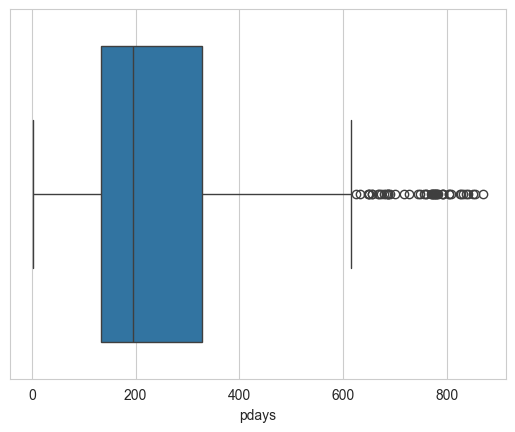

In [92]:
# distribution before pre-processing

sns.boxplot(data_used, x='pdays')
plt.show()

In [93]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['pdays']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [94]:
data_used.sample(5)

pdays    y  abs_zscore  filtered_entries
44418     92  yes    1.149481              True
38049    366   no    1.226165              True
38728    175  yes    0.429851              True
29093      5   no    1.903791              True
33144    294   no    0.601908              True

In [95]:
data_used = data_used.query("filtered_entries == True")

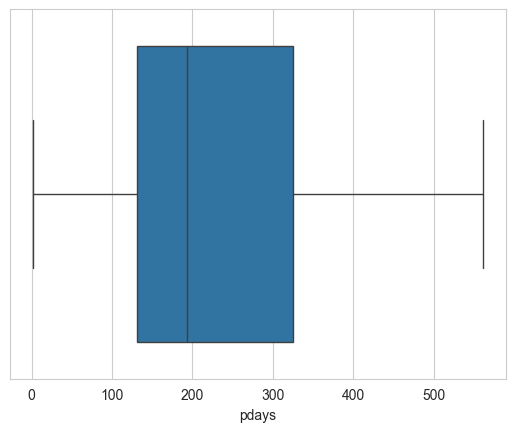

In [96]:
# distribution after pre-processing

sns.boxplot(data_used, x='pdays')
plt.show()

#### Hipotesis

> H0: Jumlah hari dihubungi pada campaign sebelumnya **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah hari dihubungi pada campaign sebelumnya **meningkatkan** keinginan nasabah membuka rekening term deposit

In [97]:
# dividing duration to long and short by manual parameter per 30days

parameter = 30
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah hari kontak terakhir yang lebih dari', parameter)

Berdasarkan pencarian pemusatan, 
Didapatkan parameter jumlah adalah hari kontak terakhir yang lebih dari 30


In [98]:
control = data_used.query("pdays <= 30")
treatment = data_used.query("pdays > 30")

#### Marketing success rate identification

In [99]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [100]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [101]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [102]:
print('Conversion Rate Control :', round(cr_control*100, 2))

Conversion Rate Control : 14.89


In [103]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

Conversion Rate Treatment :  23.15


#### Graph

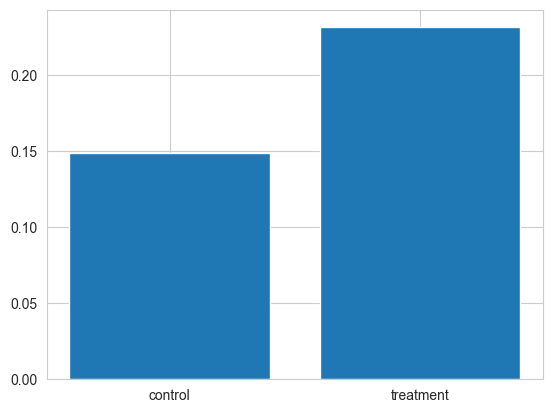

In [104]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)
plt.show()

#### z-value proportions

In [105]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [106]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

P-value yang dihasilkan melalui uji z-value proportions adalah:  0.007787778208245101


In [107]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah hari dihubungi pada campaign sebelumnya tidak meningkatkan keinginan nasabah membuka rekening deposito')
else :
    print('H1 diterima, Jumlah hari dihubungi pada campaign sebelumnya meningkatkan keinginan nasabah membuka rekening deposito')

H1 diterima, Jumlah hari dihubungi pada campaign sebelumnya meningkatkan keinginan nasabah membuka rekening deposito


#### Conclusion

Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah hari dihubungi pada campaign sebelumnya berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk customer yang yang dihubungi pada rentang yang lebih lama (lebih dari 30 hari)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **membuat durasi antar campaign menjadi lebih panjang, lebih dari 30 hari**

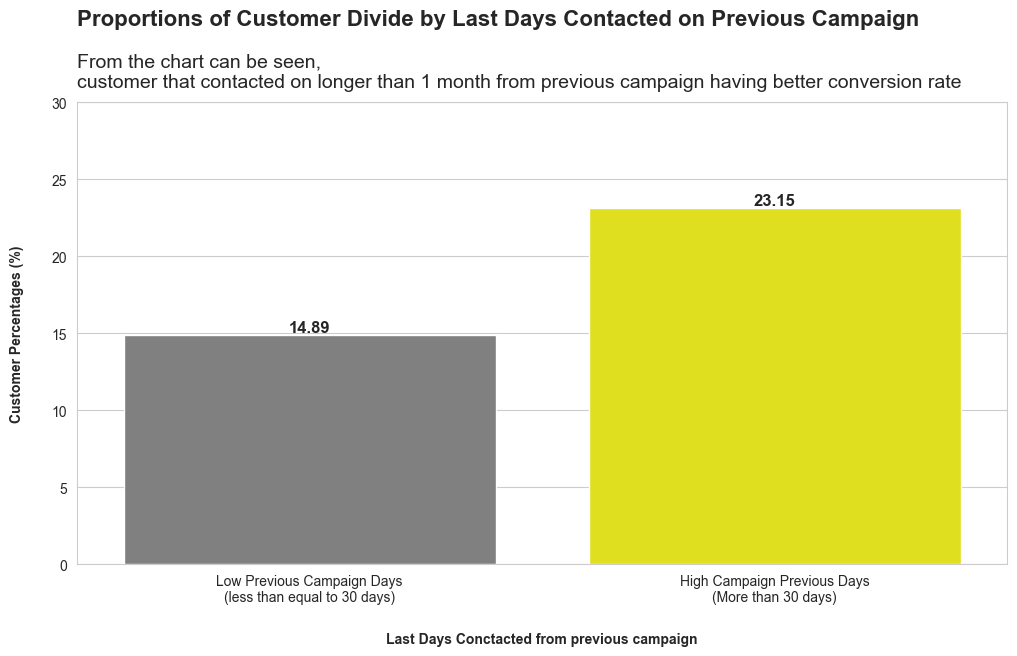

In [108]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,30)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors, legend=False)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,35,'Proportions of Customer Divide by Last Days Contacted on Previous Campaign', fontweight='bold', fontsize=16)
plt.text(-0.5,31,'From the chart can be seen,\ncustomer that contacted on longer than 1 month from previous campaign having better conversion rate', fontsize=14)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xlabel('Last Days Conctacted from previous campaign', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Previous Campaign Days\n(less than equal to 30 days)', 'High Campaign Previous Days\n(More than 30 days)'])

plt.show()

### Hubungan last day contacted of the month terhadap Conversion rate

In [109]:
data_used = data.loc[:,['day', 'y']]

In [110]:
data_used.sample(3)

day   y
13849   10  no
27076   21  no
5861    26  no

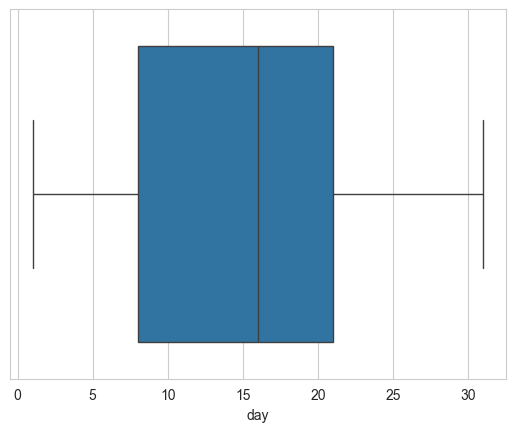

In [111]:
# distribution before pre-processing

sns.boxplot(data_used, x='day')
plt.show()

#### Hipotesis

> H0: Jumlah hari dihubungi **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah hari dihubungi  **meningkatkan** keinginan nasabah membuka rekening term deposit

In [112]:
# dividing duration to long and short by manual parameter per 30days

parameter = 15
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah hari kontak terakhir yang lebih dari', parameter)

Berdasarkan pencarian pemusatan, 
Didapatkan parameter jumlah adalah hari kontak terakhir yang lebih dari 15


In [113]:
control = data_used.query("day <= 15")
treatment = data_used.query("day > 15")

#### Marketing success rate identification

In [114]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [115]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [116]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [117]:
print('Conversion Rate Control :', round(cr_control*100, 2))

Conversion Rate Control : 12.98


In [118]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

Conversion Rate Treatment :  10.49


#### Graph

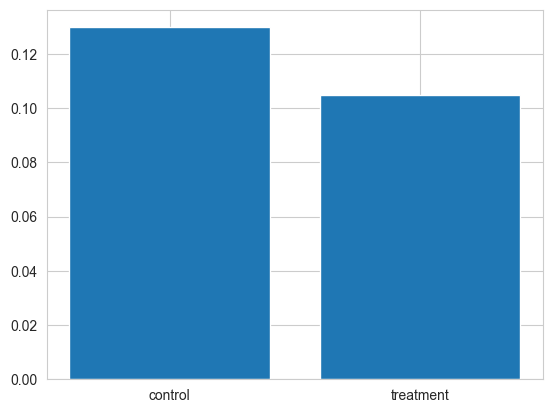

In [119]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)
plt.show()

#### z-value proportions

In [120]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [121]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

P-value yang dihasilkan melalui uji z-value proportions adalah:  1.9152714168107398e-16


In [122]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah hari dihubungi tidak meningkatkan keinginan nasabah membuka rekening deposito')
else :
    print('H1 diterima, Jumlah hari dihubungi meningkatkan keinginan nasabah membuka rekening deposito')

H1 diterima, Jumlah hari dihubungi meningkatkan keinginan nasabah membuka rekening deposito


#### Conclusion

Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah hari dihubungi berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk customer yang dihubungi pada rentang yang lebih cepat (kurang dari 15 hari)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **membuat durasi contact terakhir, lebih pendek maksimal 15 hari**

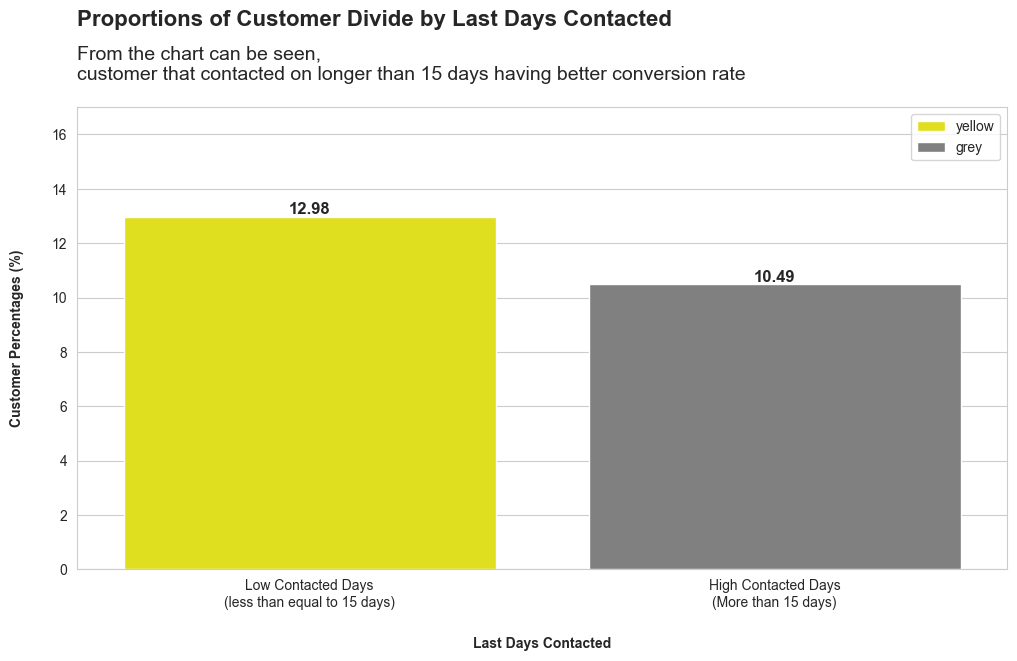

In [123]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,17)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,20,'Proportions of Customer Divide by Last Days Contacted', fontweight='bold', fontsize=16)
plt.text(-0.5,18,'From the chart can be seen,\ncustomer that contacted on longer than 15 days having better conversion rate', fontsize=14)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xlabel('Last Days Contacted', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Contacted Days\n(less than equal to 15 days)', 'High Contacted Days\n(More than 15 days)'])

plt.show()

### Hubungan Kelompok Balance Nasabah terhadap Conversion Rate

In [124]:
data_used = data.loc[:,['balance', 'y']]

In [125]:
data_used.sample(3)

balance   y
16821     -880  no
43545      182  no
42854      230  no

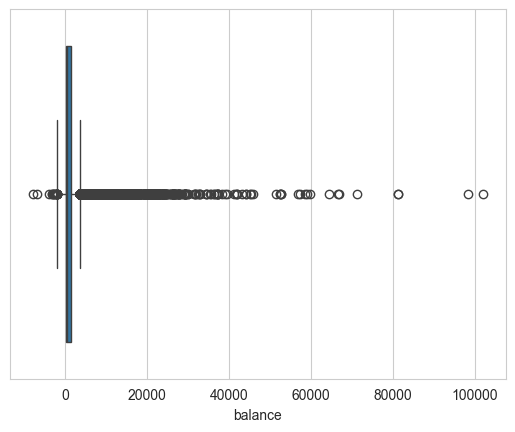

In [126]:
# distribution before pre-processing

sns.boxplot(data_used, x='balance')
plt.show()

In [127]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['balance']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [128]:
data_used.head()

balance   y  abs_zscore  filtered_entries
0     2143  no    0.256419              True
1       29  no    0.437895              True
2        2  no    0.446762              True
3     1506  no    0.047205              True
4        1  no    0.447091              True

In [129]:
data_used = data_used.query("filtered_entries == True")

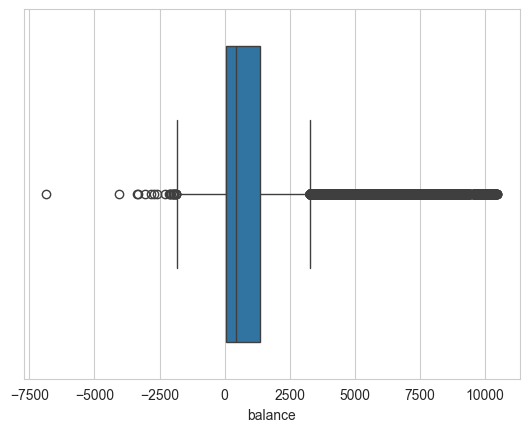

In [130]:
# distribution after pre-processing

sns.boxplot(data_used, x='balance')
plt.show()

#### Hipotesis

> H0: Jumlah balance **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah balance **meningkatkan** keinginan nasabah membuka rekening term deposit

In [131]:
# dividing duration to long and short using its median

parameter = data_used.balance.mean()
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah duration yang lebih dari', parameter)

Berdasarkan pencarian pemusatan, 
Didapatkan parameter jumlah adalah duration yang lebih dari 1084.5444834255386


In [132]:
control = data_used.query("balance <= 1084.5444834255386")
treatment = data_used.query("balance > 1084.5444834255386")

#### Marketing success rate identification

In [133]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [134]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [135]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [136]:
print('Conversion Rate Control :', round(cr_control*100, 2))

Conversion Rate Control : 9.99


In [137]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

Conversion Rate Treatment :  15.51


#### Graph

<BarContainer object of 2 artists>

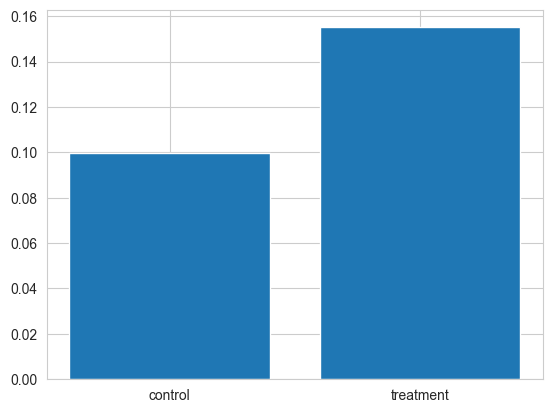

In [138]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)

#### z-value proportions

In [139]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [140]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

P-value yang dihasilkan melalui uji z-value proportions adalah:  8.588631819804063e-62


In [141]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah Balance tidak meningkatkan keinginan nasabah membuka rekening term deposit')
else :
    print('H1 diterima, Jumlah Balance meningkatkan keinginan nasabah membuka rekening term deposit')

H1 diterima, Jumlah Balance meningkatkan keinginan nasabah membuka rekening term deposit


#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah kelompok balance customer berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk jumlah kelompok balance diatas rata-rata (kurang sama dengan 1084 euro)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **menghubungi kelompok balance yang diatas rata-rata.**

#### Visualization

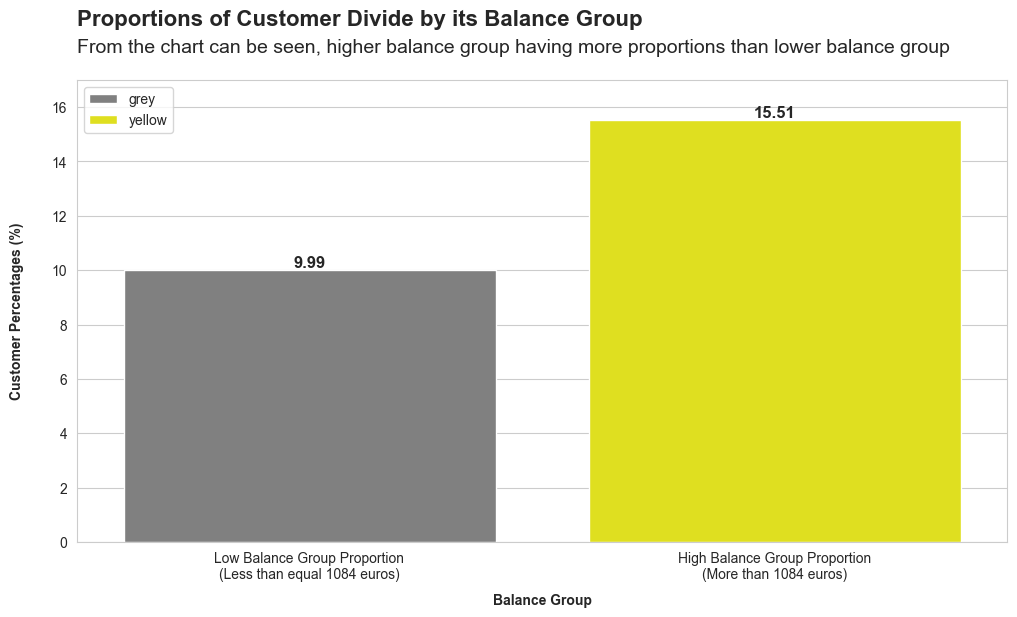

In [142]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,17)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,19,'Proportions of Customer Divide by its Balance Group', fontweight='bold', fontsize=16)
plt.text(-0.5,18,'From the chart can be seen, higher balance group having more proportions than lower balance group', fontsize='14')
plt.xlabel('Balance Group', fontweight='bold', labelpad=8)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Balance Group Proportion\n(Less than equal 1084 euros)', 'High Balance Group Proportion\n(More than 1084 euros)'])

plt.show()

### Hubungan Kelompok Umur terhadap Conversion Rate

In [143]:
data_used = data.loc[:,['age', 'y']]

In [144]:
data_used.sample(3)

age   y
37555   55  no
39809   49  no
35506   27  no

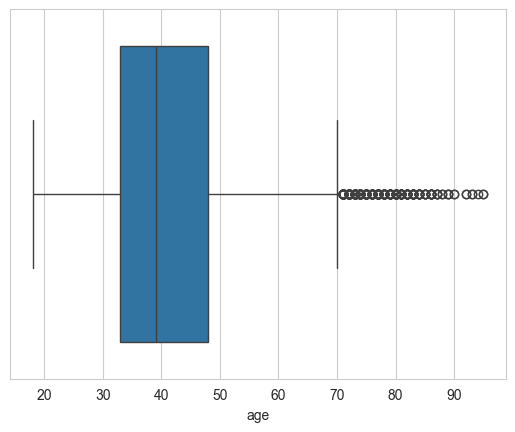

In [145]:
# distribution before pre-processing

sns.boxplot(data_used, x='age')
plt.show()

In [146]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['age']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [147]:
data_used.head()

age   y  abs_zscore  filtered_entries
0   58  no    1.606965              True
1   44  no    0.288529              True
2   33  no    0.747384              True
3   47  no    0.571051              True
4   33  no    0.747384              True

In [148]:
data_used = data_used.query("filtered_entries == True")

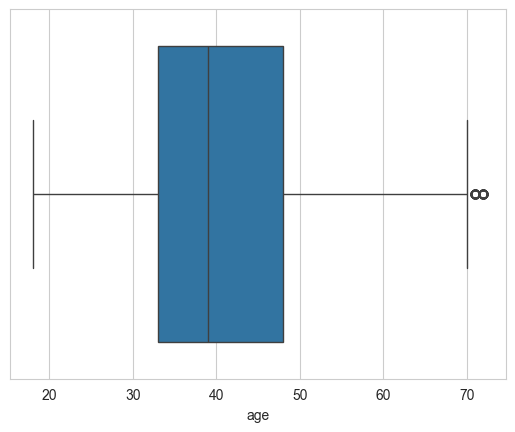

In [149]:
# distribution after pre-processing

sns.boxplot(data_used, x='age')
plt.show()

#### Hipotesis

> H0: Kelompok Umur **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Kelompok Umur **meningkatkan** keinginan nasabah membuka rekening term deposit

In [176]:
data_used.age.describe()

count    44830.000000
mean        40.618693
std         10.079146
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         72.000000
Name: age, dtype: float64

In [180]:
data_used.age.mode()[0]

32

<Axes: xlabel='age', ylabel='count'>

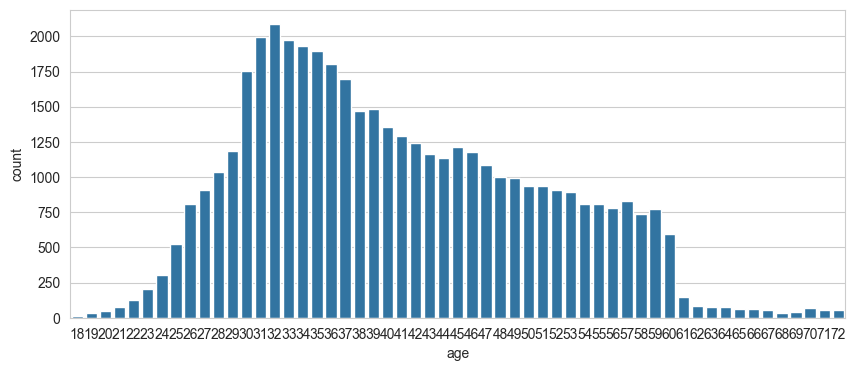

In [195]:
plt.figure(figsize=(10,4))
sns.countplot(x=data_used.age)

In [208]:
# dividing duration to long and short using its median

parameter = data_used.age.quantile(.75)
print('Berdasarkan pencarian pemusatan, Didapatkan parameter jumlah adalah duration yang lebih dari', parameter)

Berdasarkan pencarian pemusatan, Didapatkan parameter jumlah adalah duration yang lebih dari 48.0


In [197]:
control = data_used.query("age <= 48")
treatment = data_used.query("age > 48")

#### Marketing success rate identification

In [198]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [199]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [200]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [201]:
print('Conversion Rate Control :', round(cr_control*100, 2))

Conversion Rate Control : 11.18


In [202]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

Conversion Rate Treatment :  12.19


#### Graph

<BarContainer object of 2 artists>

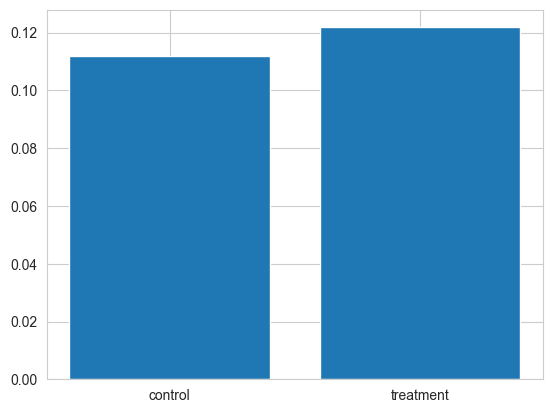

In [203]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)

#### z-value proportions

In [204]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [205]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

P-value yang dihasilkan melalui uji z-value proportions adalah:  0.004073320571653521


In [206]:
if pvalue >= 0.05 : 
    print('H0 diterima, Kelompok Umur tidak meningkatkan keinginan nasabah membuka rekening term deposit')
else :
    print('H1 diterima, Kelompok Umur meningkatkan keinginan nasabah membuka rekening term deposit')

H1 diterima, Kelompok Umur meningkatkan keinginan nasabah membuka rekening term deposit


#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah kelompok umur customer berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk jumlah kelompok kelompok umur di bawah sama dengan 20.**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **menghubungi kelompok umur yang di bawah sama dengan 20.**

#### Visualization

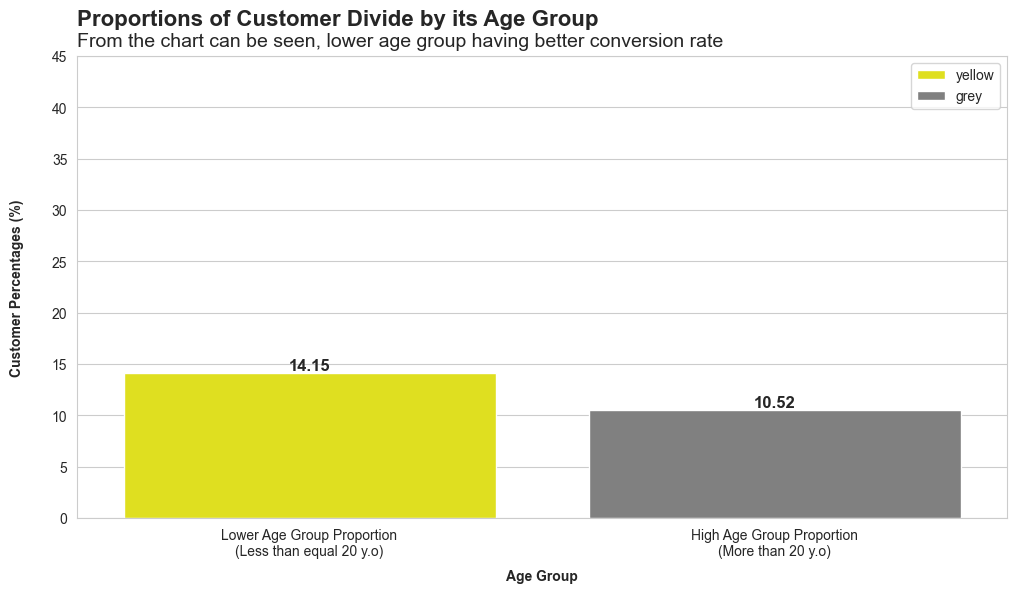

In [193]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,45)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,48,'Proportions of Customer Divide by its Age Group', fontweight='bold', fontsize=16)
plt.text(-0.5,46,'From the chart can be seen, lower age group having better conversion rate', fontsize='14')
plt.xlabel('Age Group', fontweight='bold', labelpad=8)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Lower Age Group Proportion\n(Less than equal 20 y.o)', 'High Age Group Proportion\n(More than 20 y.o)'])

plt.show()

### Subplots Business Insights

In [162]:
# age

lower_age  = 11.18
higher_age = 12.19
age=[lower_age, higher_age]

# balance

lower_balance  = 9.99
higher_balance = 15.51
balance=[lower_balance,higher_balance]

# contacted

lower_contacted  = 12.98
higher_contacted = 10.49
contacted = [lower_contacted,higher_contacted]

# previous campaign amount

lower_previous_campaign  = 14.89
higher_previous_campaign = 23.15
previous_campaign = [lower_previous_campaign, higher_previous_campaign]

# contacted previous
lower_contacted_previous = 9.16
higher_contacted_previous = 22.96
contacted_previous = [lower_contacted_previous, higher_contacted_previous]

# campaign

lower_campaign  = 13.19
higher_campaign = 9.08
campaign = [lower_campaign,higher_campaign]

# call duration

lower_duration  = 3.04
higher_duration = 18.29
duration = [lower_duration,higher_duration]

In [163]:
fig, ax = plt.subplots(2,4, figsize=(16,8), dpi=600)
sns.set_style("whitegrid")
ax[1,3].axis('off')
fig.tight_layout(pad=1, w_pad=1, h_pad=4.0)
fig.text(-0.02, 0.5, 'Customer Percentages (%)', va='center', rotation='vertical')
fig.text(0.02,1.1,'Proportions of Converted Customer Divided into Lower & Higher Group', fontweight='bold', fontsize=16)
fig.text(0.02,1.06,'Result came from univariate analysis into each numerical feature available using z-value score proportions', fontsize='14')

yellow_patch = mpatches.Patch(color='#FBB041', label='Higher Conversion Group')
lightgrey_patch = mpatches.Patch(color='lightgrey', label='Lower Conversion Group')
fig.legend(handles=[yellow_patch, lightgrey_patch], loc='upper right')

sns.barplot(x=['Lower Age\n(≤ 20 y.o)','Higher Age\n(> 20 y.o)'], 
            y=[lower_age, higher_age], ax=ax[0,0], 
            palette=['lightgrey' if (x < max(age)) else '#FBB041' for x in age],
            hue=['lightgrey' if (x < max(age)) else '#FBB041' for x in age],
           legend=False)
ax[0,0].bar_label(ax[0,0].containers[0], fontsize=8, fontweight='bold')
ax[0,0].bar_label(ax[0,0].containers[1], fontsize=8, fontweight='bold')
ax[0,0].set_ylim(0,45)
ax[0,0].set_xlabel('Age Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Balance\n(≤ 1084 euros)','Higher Balance\n(> 1084 euros)'], 
            y=[lower_balance, higher_balance], ax=ax[0,1],
           palette=['lightgrey' if (x < max(balance)) else '#FBB041' for x in balance],
            hue=['lightgrey' if (x < max(balance)) else '#FBB041' for x in balance],
           legend=False)
ax[0,1].bar_label(ax[0,1].containers[0], fontsize=8, fontweight='bold')
ax[0,1].bar_label(ax[0,1].containers[1], fontsize=8, fontweight='bold')
ax[0,1].set_ylim(0,25)
ax[0,1].set_xlabel('Balance Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Day\n(≤ 15 days)','Higher Day\n(> 15 days)'], 
            y=[lower_contacted, higher_contacted], ax=ax[0,2],
            palette=['lightgrey' if (x < max(contacted)) else '#FBB041' for x in contacted],
           hue=['lightgrey' if (x < max(contacted)) else '#FBB041' for x in contacted],
           legend=False)
ax[0,2].bar_label(ax[0,2].containers[0], fontsize=8, fontweight='bold')
ax[0,2].bar_label(ax[0,2].containers[1], fontsize=8, fontweight='bold')
ax[0,2].set_ylim(0,20)
ax[0,2].set_xlabel('Contacted Days Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Not Contacted\n(0)','Contacted\n(> 0)'], 
            y=[lower_previous_campaign, higher_previous_campaign], ax=ax[0,3],
            palette=['lightgrey' if (x < max(previous_campaign)) else '#FBB041' for x in previous_campaign],
           hue=['lightgrey' if (x < max(previous_campaign)) else '#FBB041' for x in previous_campaign],
           legend=False)
ax[0,3].bar_label(ax[0,3].containers[0], fontsize=8, fontweight='bold')
ax[0,3].bar_label(ax[0,3].containers[1], fontsize=8, fontweight='bold')
ax[0,3].set_ylim(0,30)
ax[0,3].set_xlabel('Previous Campaign Amount Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Days\n(≤ 30 days)','Higher Days\n(> 30 days)'], 
            y=[lower_contacted_previous, higher_contacted_previous], ax=ax[1,0],
            palette=['lightgrey' if (x < max(contacted_previous)) else '#FBB041' for x in contacted_previous],
           hue=['lightgrey' if (x < max(contacted_previous)) else '#FBB041' for x in contacted_previous],
           legend=False)
ax[1,0].bar_label(ax[1,0].containers[0], fontsize=8, fontweight='bold')
ax[1,0].bar_label(ax[1,0].containers[1], fontsize=8, fontweight='bold')
ax[1,0].set_ylim(0,30)
ax[1,0].set_xlabel('Previous Campaign Contacted Days Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Amount\n(≤ 2)','Higher Amount\n(> 2)'], 
            y=[lower_campaign, higher_campaign], ax=ax[1,1],
            palette=['lightgrey' if (x < max(campaign)) else '#FBB041' for x in campaign],
           hue=['lightgrey' if (x < max(campaign)) else '#FBB041' for x in campaign],
           legend=False)
ax[1,1].bar_label(ax[1,1].containers[0], fontsize=8, fontweight='bold')
ax[1,1].bar_label(ax[1,1].containers[1], fontsize=8, fontweight='bold')
ax[1,1].set_ylim(0,25)
ax[1,1].set_xlabel('Campaign Amount Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Duration\n(≤ 176 seconds)','Higher Duration\n(> 176 seconds)'], 
            y=[lower_duration, higher_duration], ax=ax[1,2],
            palette=['lightgrey' if (x < max(duration)) else '#FBB041' for x in duration],
           hue=['lightgrey' if (x < max(duration)) else '#FBB041' for x in duration],
           legend=False)
ax[1,2].bar_label(ax[1,2].containers[0], fontsize=8, fontweight='bold')
ax[1,2].bar_label(ax[1,2].containers[1], fontsize=8, fontweight='bold')
ax[1,2].set_ylim(0,30)
ax[1,2].set_xlabel('Call Duration Group', labelpad=8, fontweight='bold')


plt.show()

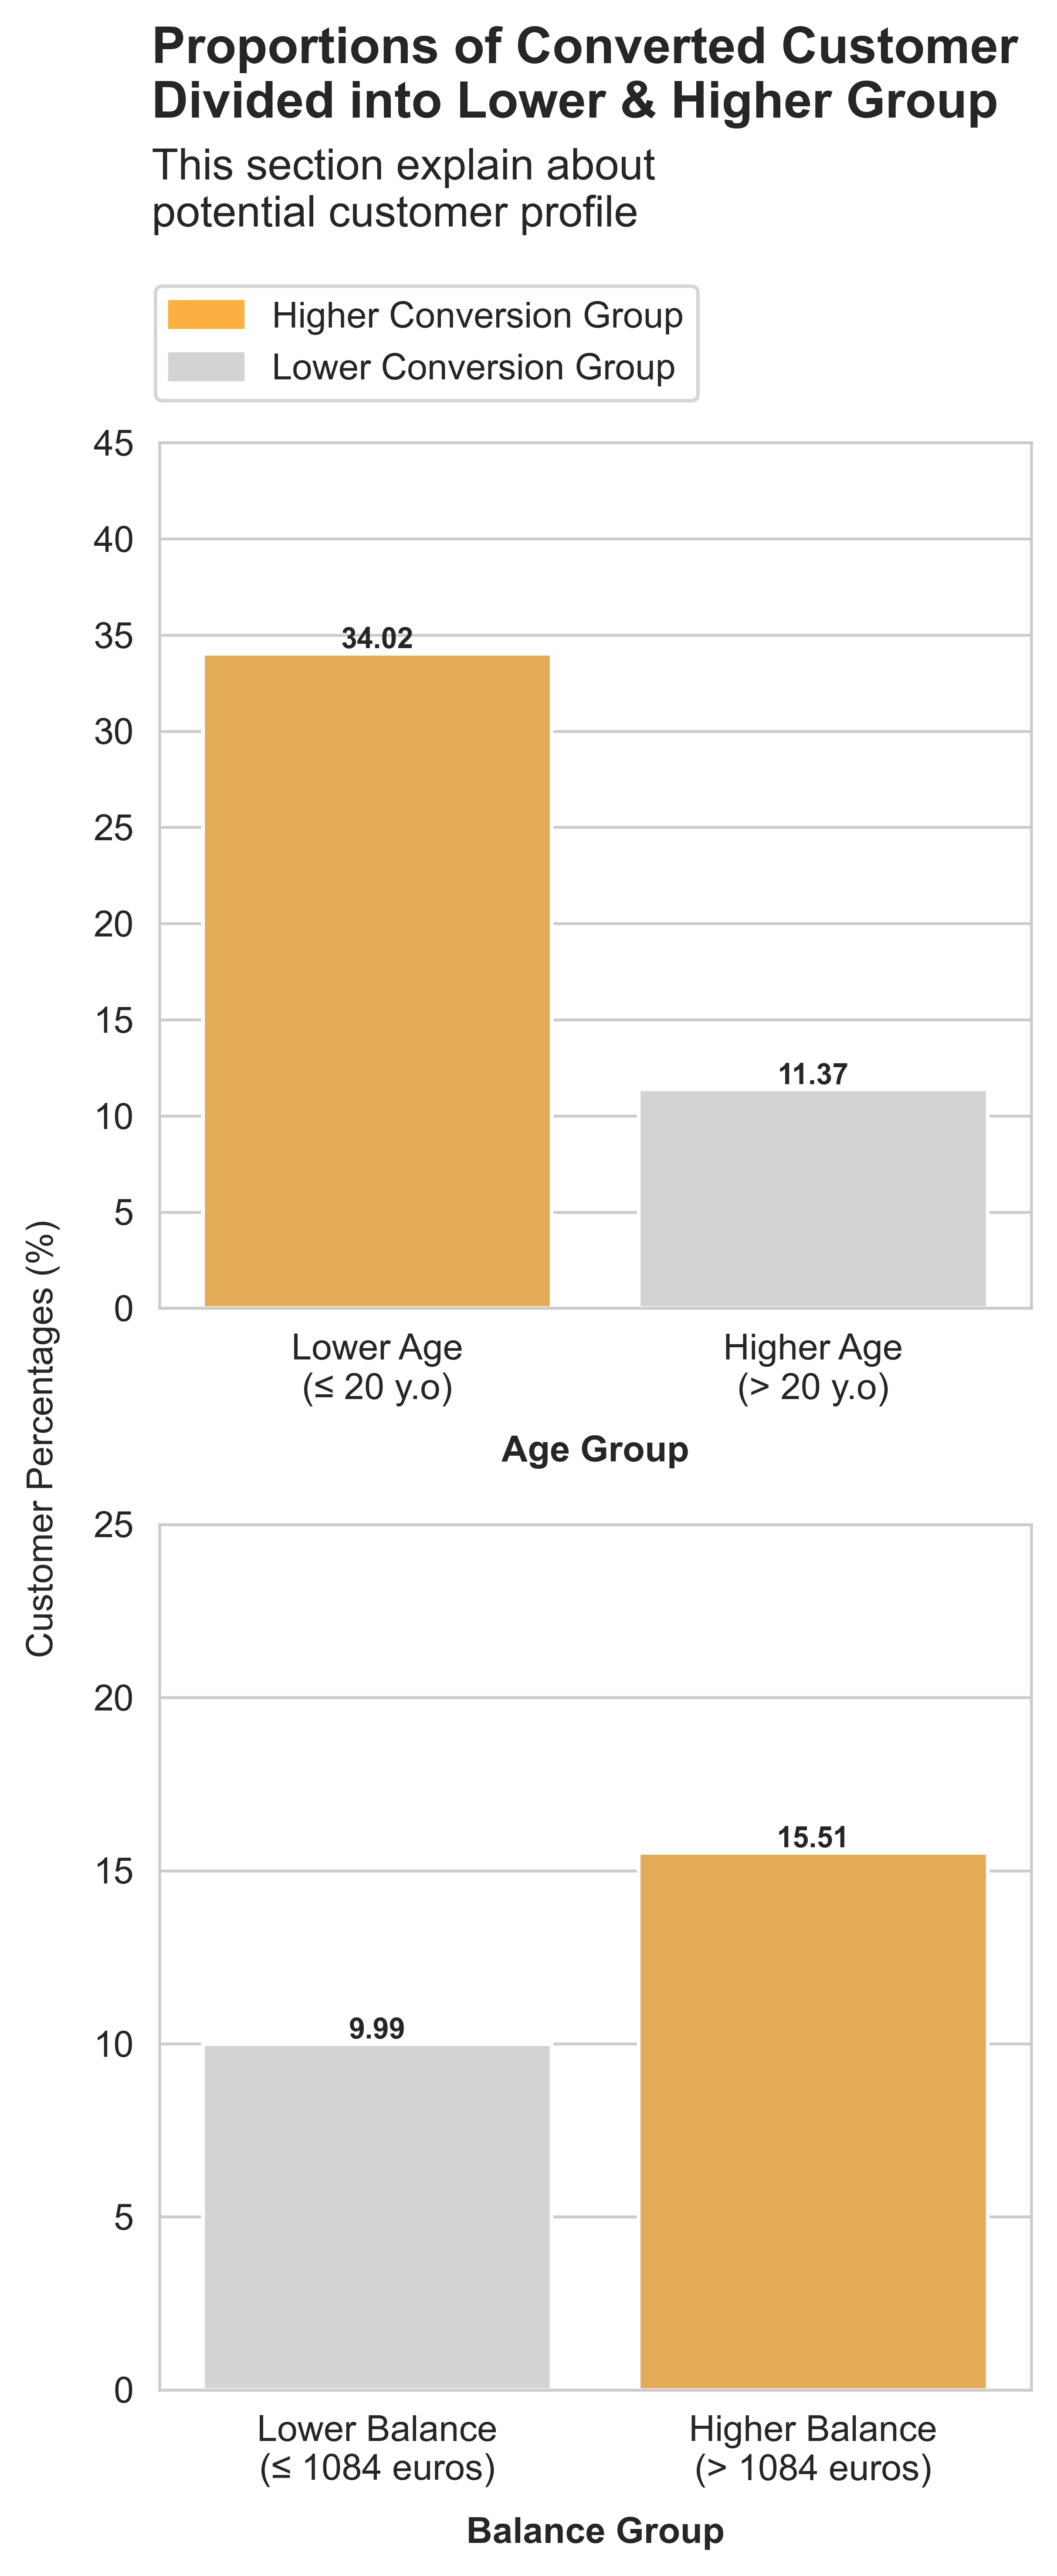

In [250]:
fig, ax = plt.subplots(2,1, figsize=(4,8), dpi=600)
sns.set_style("whitegrid")
fig.tight_layout(pad=1, w_pad=1, h_pad=4.0)
fig.text(-0.02, 0.5, 'Customer Percentages (%)', va='center', rotation='vertical')
fig.text(0.1,1.132,'Proportions of Converted Customer\nDivided into Lower & Higher Group', fontweight='bold', fontsize=14)
fig.text(0.1,1.08,'This section explain about\npotential customer profile', fontsize=12)

yellow_patch = mpatches.Patch(color='#FBB041', label='Higher Conversion Group')
lightgrey_patch = mpatches.Patch(color='lightgrey', label='Lower Conversion Group')
fig.legend(handles=[yellow_patch, lightgrey_patch], bbox_to_anchor=(0.64, 1.06))

sns.barplot(x=['Lower Age\n(≤ 20 y.o)','Higher Age\n(> 20 y.o)'], 
            y=[lower_age, higher_age], ax=ax[0], 
            palette=['lightgrey' if (x < max(age)) else '#FBB041' for x in age],
            hue=['lightgrey' if (x < max(age)) else '#FBB041' for x in age],
           legend=False)
ax[0].bar_label(ax[0].containers[0], fontsize=8, fontweight='bold')
ax[0].bar_label(ax[0].containers[1], fontsize=8, fontweight='bold')
ax[0].set_ylim(0,45)
ax[0].set_xlabel('Age Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Balance\n(≤ 1084 euros)','Higher Balance\n(> 1084 euros)'], 
            y=[lower_balance, higher_balance], ax=ax[1],
           palette=['lightgrey' if (x < max(balance)) else '#FBB041' for x in balance],
            hue=['lightgrey' if (x < max(balance)) else '#FBB041' for x in balance],
           legend=False)
ax[1].bar_label(ax[1].containers[0], fontsize=8, fontweight='bold')
ax[1].bar_label(ax[1].containers[1], fontsize=8, fontweight='bold')
ax[1].set_ylim(0,25)
ax[1].set_xlabel('Balance Group', labelpad=8, fontweight='bold')

plt.show()

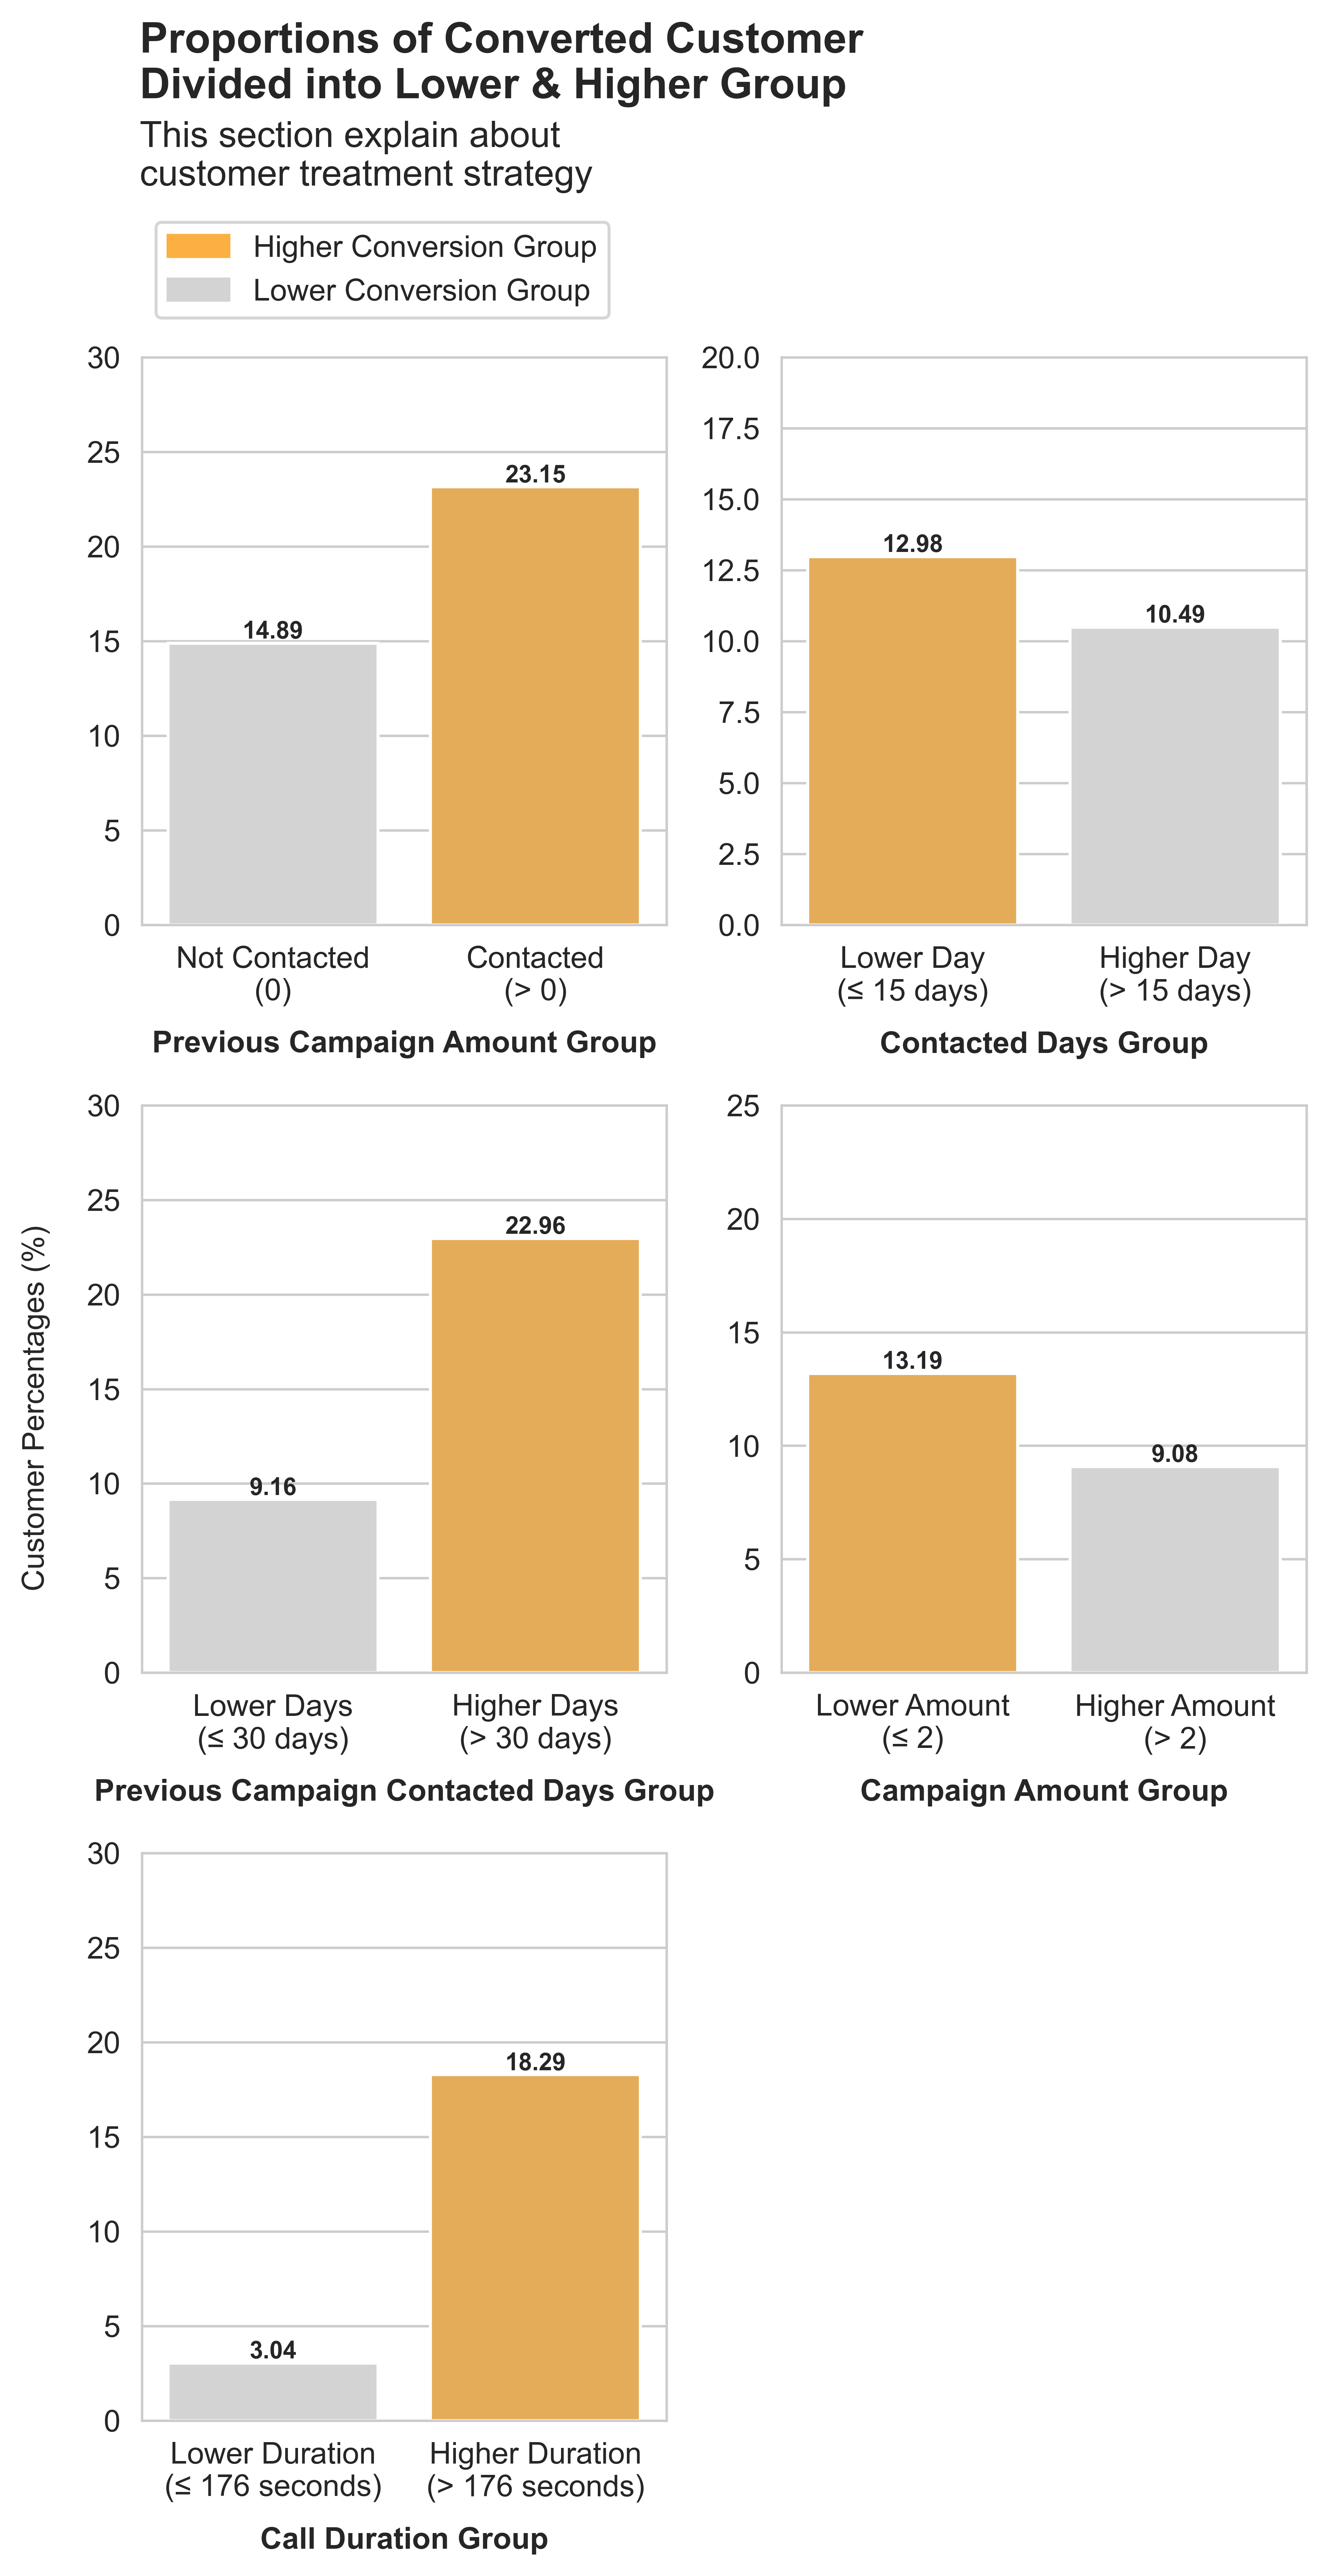

In [266]:
fig, ax = plt.subplots(3,2, figsize=(6,10), dpi=600)
sns.set_style("whitegrid")
ax[2,1].axis('off')
fig.tight_layout(pad=1, w_pad=1, h_pad=4.0)
fig.text(-0.02, 0.5, 'Customer Percentages (%)', va='center', rotation='vertical')
fig.text(0.07,1.1,'Proportions of Converted Customer\nDivided into Lower & Higher Group', fontweight='bold', fontsize=14)
fig.text(0.07,1.06,'This section explain about\ncustomer treatment strategy', fontsize=12)

yellow_patch = mpatches.Patch(color='#FBB041', label='Higher Conversion Group')
lightgrey_patch = mpatches.Patch(color='lightgrey', label='Lower Conversion Group')
fig.legend(handles=[yellow_patch, lightgrey_patch], bbox_to_anchor=(0.44, 1.05))

sns.barplot(x=['Not Contacted\n(0)','Contacted\n(> 0)'], 
            y=[lower_previous_campaign, higher_previous_campaign], ax=ax[0,0],
            palette=['lightgrey' if (x < max(previous_campaign)) else '#FBB041' for x in previous_campaign],
           hue=['lightgrey' if (x < max(previous_campaign)) else '#FBB041' for x in previous_campaign],
           legend=False)
ax[0,0].bar_label(ax[0,0].containers[0], fontsize=8, fontweight='bold')
ax[0,0].bar_label(ax[0,0].containers[1], fontsize=8, fontweight='bold')
ax[0,0].set_ylim(0,30)
ax[0,0].set_xlabel('Previous Campaign Amount Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Day\n(≤ 15 days)','Higher Day\n(> 15 days)'], 
            y=[lower_contacted, higher_contacted], ax=ax[0,1],
            palette=['lightgrey' if (x < max(contacted)) else '#FBB041' for x in contacted],
           hue=['lightgrey' if (x < max(contacted)) else '#FBB041' for x in contacted],
           legend=False)
ax[0,1].bar_label(ax[0,1].containers[0], fontsize=8, fontweight='bold')
ax[0,1].bar_label(ax[0,1].containers[1], fontsize=8, fontweight='bold')
ax[0,1].set_ylim(0,20)
ax[0,1].set_xlabel('Contacted Days Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Days\n(≤ 30 days)','Higher Days\n(> 30 days)'], 
            y=[lower_contacted_previous, higher_contacted_previous], ax=ax[1,0],
            palette=['lightgrey' if (x < max(contacted_previous)) else '#FBB041' for x in contacted_previous],
           hue=['lightgrey' if (x < max(contacted_previous)) else '#FBB041' for x in contacted_previous],
           legend=False)
ax[1,0].bar_label(ax[1,0].containers[0], fontsize=8, fontweight='bold')
ax[1,0].bar_label(ax[1,0].containers[1], fontsize=8, fontweight='bold')
ax[1,0].set_ylim(0,30)
ax[1,0].set_xlabel('Previous Campaign Contacted Days Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Amount\n(≤ 2)','Higher Amount\n(> 2)'], 
            y=[lower_campaign, higher_campaign], ax=ax[1,1],
            palette=['lightgrey' if (x < max(campaign)) else '#FBB041' for x in campaign],
           hue=['lightgrey' if (x < max(campaign)) else '#FBB041' for x in campaign],
           legend=False)
ax[1,1].bar_label(ax[1,1].containers[0], fontsize=8, fontweight='bold')
ax[1,1].bar_label(ax[1,1].containers[1], fontsize=8, fontweight='bold')
ax[1,1].set_ylim(0,25)
ax[1,1].set_xlabel('Campaign Amount Group', labelpad=8, fontweight='bold')

sns.barplot(x=['Lower Duration\n(≤ 176 seconds)','Higher Duration\n(> 176 seconds)'], 
            y=[lower_duration, higher_duration], ax=ax[2,0],
            palette=['lightgrey' if (x < max(duration)) else '#FBB041' for x in duration],
           hue=['lightgrey' if (x < max(duration)) else '#FBB041' for x in duration],
           legend=False)
ax[2,0].bar_label(ax[2,0].containers[0], fontsize=8, fontweight='bold')
ax[2,0].bar_label(ax[2,0].containers[1], fontsize=8, fontweight='bold')
ax[2,0].set_ylim(0,30)
ax[2,0].set_xlabel('Call Duration Group', labelpad=8, fontweight='bold')


plt.show()